In [1]:
## --- Importing Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import yellowbrick
import pickle

from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100
set_palette('dark')

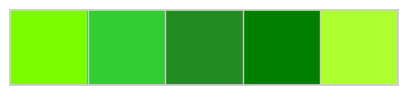

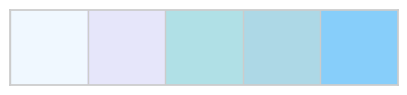

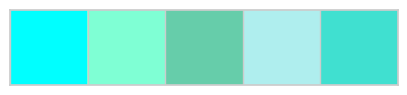

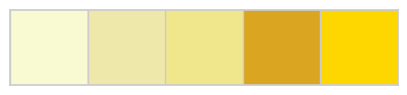

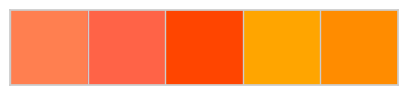

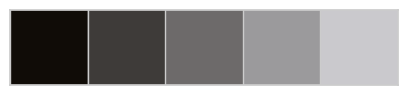

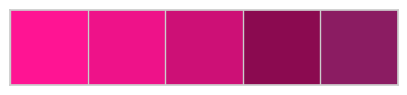

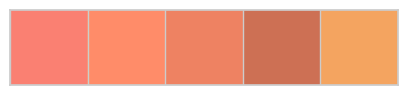

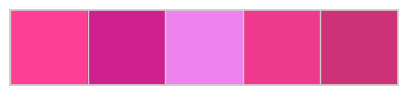

In [2]:
# --- Create List of Color Palletes ---
green_grad = ['#7CFC00', '#32CD32', '#228B22', '#008000', '#ADFF2F']
blue_grad = ['#F0F8FF', '#E6E6FA', '#B0E0E6', '#ADD8E6', '#87CEFA']
cyan_grad = ['#00FFFF', '#7FFFD4', '#66CDAA', '#AFEEEE', '#40E0D0']
gold_grad = ['#FAFAD2', '#EEE8AA', '#F0E68C', '#DAA520', '#FFD700']
coral_grad = ['#FF7F50', '#FF6347', '#FF4500', '#FFA500', '#FF8C00']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']
pink_grad = ['#FF1493', '#EE1289', '#CD1076', '#8B0A50', '#8B1C62']
brown_grad = ['#FA8072', '#FF8C69', '#EE8262', '#CD7054', '#F4A460']
purple_grad = ['#FF3E96', '#D02090', '#EE82EE','#EE3A8C', '#CD3278']

# --- Plot Color Palletes --
sns.palplot(green_grad)
sns.palplot(blue_grad)
sns.palplot(cyan_grad)
sns.palplot(gold_grad)
sns.palplot(coral_grad)
sns.palplot(black_grad)
sns.palplot(pink_grad)
sns.palplot(brown_grad)
sns.palplot(purple_grad)

In [3]:
# --- Importing Dataset ---
#Reads in dataset
df = pd.read_csv('C:/Users/akank/Downloads/HepatitisCdata.csv', index_col=0)

# --- Reading Dataset ---
df.head().style.background_gradient(cmap='Pastel1').set_properties(**{'font-family': 'Bodoni'}).hide_index()

Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0=Blood Donor,32,m,38.500000,52.500000,7.700000,22.100000,7.500000,6.930000,3.230000,106.000000,12.100000,69.000000
0=Blood Donor,32,m,38.500000,70.300000,18.000000,24.700000,3.900000,11.170000,4.800000,74.000000,15.600000,76.500000
0=Blood Donor,32,m,46.900000,74.700000,36.200000,52.600000,6.100000,8.840000,5.200000,86.000000,33.200000,79.300000
0=Blood Donor,32,m,43.200000,52.000000,30.600000,22.600000,18.900000,7.330000,4.740000,80.000000,33.800000,75.700000
0=Blood Donor,32,m,39.200000,74.100000,32.600000,24.800000,9.600000,9.150000,4.320000,76.000000,29.900000,68.700000


In [4]:
# --- Print Dataset Info ---
print('\033[1m'+':: Dataset Info ::'+'\033[0m')
print('*' * 30)
print('Total Rows:'+'\033[1m', df.shape[0])
print('\033[0m'+'Total Columns:'+'\033[1m', df.shape[1])
print('\033[0m'+'*' * 30)
print('\n')

# --- Print Dataset Detail ---
print('\033[1m'+':: Dataset Details ::'+'\033[0m')
print('*' * 30)
df.info(memory_usage = False)

:: Dataset Info ::
******************************
Total Rows: 615
Total Columns: 13
******************************


:: Dataset Details ::
******************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 1 to 615
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)

In [5]:
df.isna().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [6]:
# For Numerical Type
df.select_dtypes(include=(['float64'])).isna().sum()

ALB      1
ALP     18
ALT      1
AST      0
BIL      0
CHE      0
CHOL    10
CREA     0
GGT      0
PROT     1
dtype: int64

In [7]:
df.select_dtypes(include=(['float64'])).isna().sum()
df_num_col = df.select_dtypes(include=(['float64'])).columns
for c in df_num_col:
    df[c].fillna(df[c].median(), inplace=True)

df.select_dtypes(include=(['float64'])).isna().sum()

ALB     0
ALP     0
ALT     0
AST     0
BIL     0
CHE     0
CHOL    0
CREA    0
GGT     0
PROT    0
dtype: int64

In [8]:
df['Category'].value_counts()

0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64

In [9]:
#maps target feature 
target_map = {'0=Blood Donor': 'Healthy',
             '0s=suspect Blood Donor': 'Healthy', #suspects are binned with blood donors for simplicity
             '1=Hepatitis': 'Hepatitis',
             '2=Fibrosis': 'Fibrosis',
             '3=Cirrhosis': 'Cirrhosis'}

df['Category'] = df.Category.map(target_map)

******************************
:: Category of Blood Donors ::
******************************


Healthy      540
Cirrhosis     30
Hepatitis     24
Fibrosis      21
Name: Category, dtype: int64

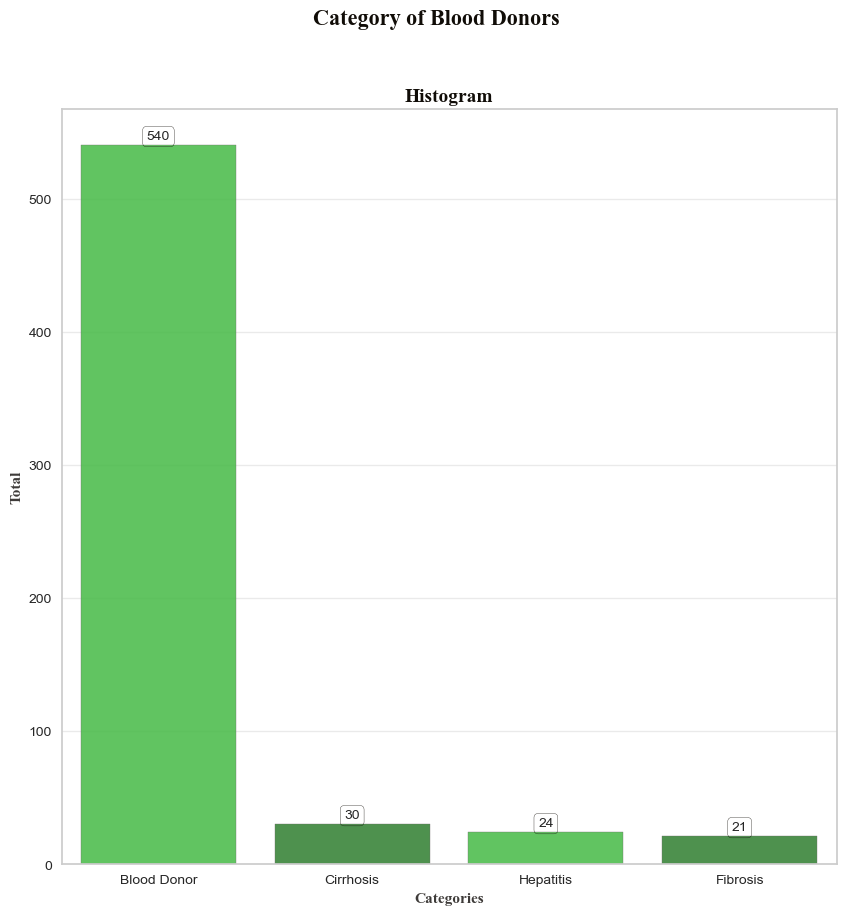

In [10]:
# --- Setting Colors, Labels, Order ---
colors=green_grad[1:3]
labels=['Blood Donor', 'Cirrhosis', 'Hepatitis', 'Fibrosis']
order=df['Category'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(10, 10))
plt.suptitle('Category of Blood Donors', fontweight='heavy', 
             fontsize='16', fontfamily='times new roman', color=black_grad[0])

# --- Histogram ---
plt.title('Histogram', fontweight='bold', fontsize=14, 
          fontfamily='times new roman', color=black_grad[0])
ax = sns.countplot(x='Category', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', edgecolor=black_grad[0], 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Categories', fontweight='bold', fontsize=11, fontfamily='times new roman', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='times new roman', 
           color=black_grad[1])
plt.xticks([0, 1, 2, 3], labels)
plt.grid(axis='y', alpha=0.4)

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 30)
print('\033[1m'+':: Category of Blood Donors ::'+'\033[1m')
print('*' * 30)
df.Category.value_counts(dropna=False)

.: Age Column Skewness & Kurtosis :.
****************************************
Skewness: 0.267
Kurtosis: -0.386




<Figure size 800x550 with 0 Axes>

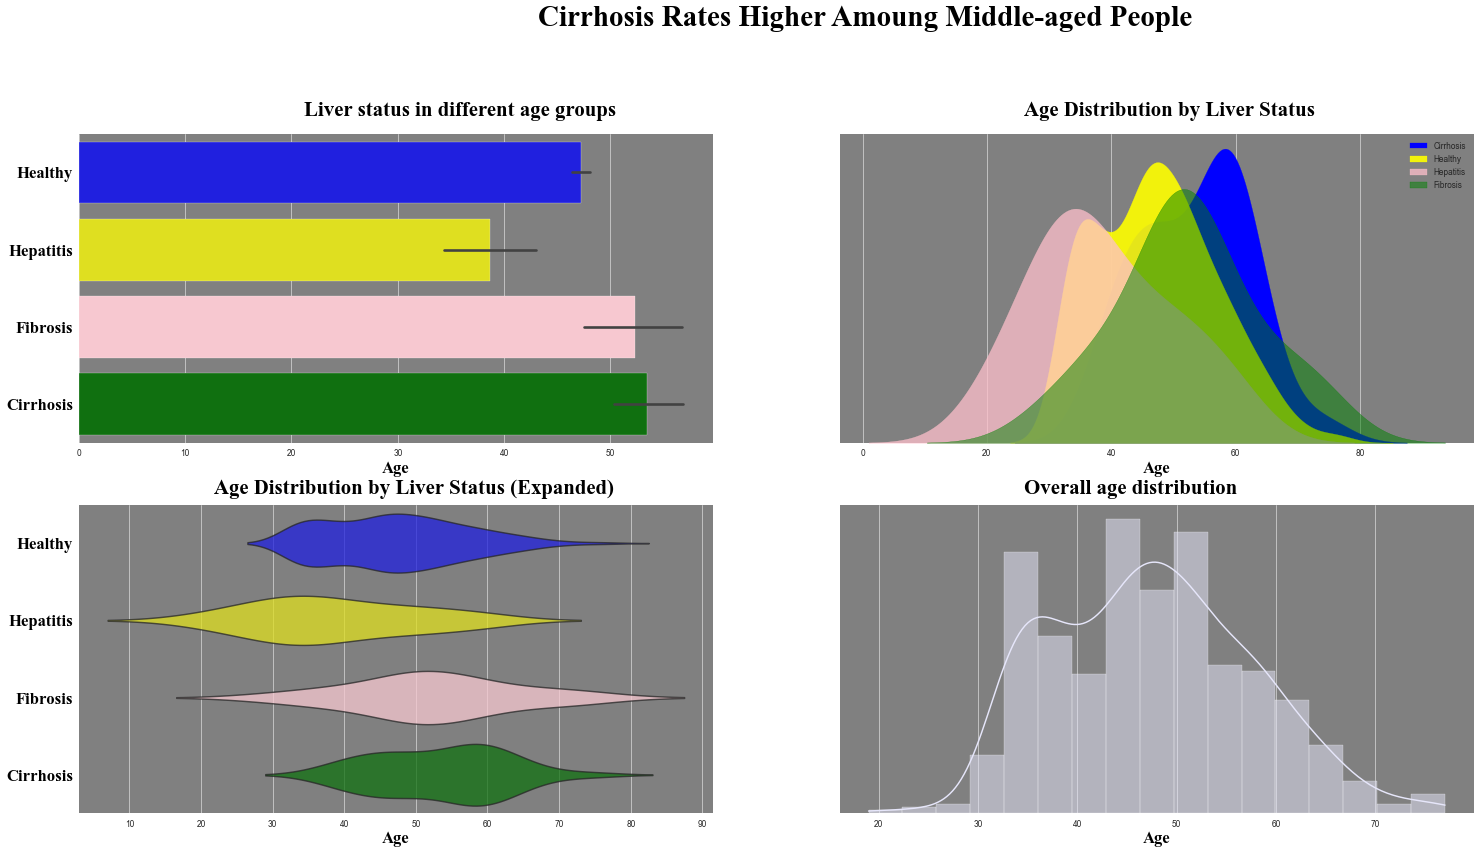

In [11]:
# --- Variable, Color & Plot Size ---
var = 'Age'
color = green_grad[1]
labels=['Blood Donor', 'Cirrhosis', 'Hepatitis', 'Fibrosis']

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Age Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
plt.suptitle('Age Column Distribution', fontweight='bold', fontsize=16, 
             fontfamily='times new roman', color=black_grad[0])
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=1, hspace=3)
plt.tight_layout()

# --- Plot dimensions ---
fig = plt.figure(figsize = (30, 15), dpi = 60)
sns.set_palette(sns.color_palette(['blue','yellow', 'pink', 'green']))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# axes list
axes = [ ax1, ax2, ax3, ax4]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('grey')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)
        
#-------Barplot------------------------------------------------
sns.barplot(x=df[var], y=df['Category'], ax=ax1,)
ax1.axes.get_yaxis().set_visible(True)
ax1.set_ylabel('')
ax1.set_yticklabels( labels = ['Healthy', 'Hepatitis', 'Fibrosis', 'Cirrhosis'], fontdict = {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})
ax1.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})

#-------Kernel Distribution wrt Disease status------------------------------------------------
sns.kdeplot(var, data=df[df.Category=='Cirrhosis'], ax=ax2, shade=True, color='blue', alpha=1, label='Cirrhosis')
sns.kdeplot(var, data=df[df.Category=='Healthy'], ax=ax2, shade=True, color='yellow', alpha=0.9, label='Healthy')
sns.kdeplot(var, data=df[df.Category=='Hepatitis'], ax=ax2, shade=True, color='pink',  alpha=0.75, label='Hepatitis')
sns.kdeplot(var, data=df[df.Category=='Fibrosis'], ax=ax2, shade=True, color='green', alpha=0.5,  label='Fibrosis')
ax2.legend()
ax2.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})


#-------Violin plot------------------------------------------------
ax3_plot = sns.violinplot(x=var, y='Category', data=df,  ax=ax3, aspect=2, inner=None)
for item in ax3_plot.collections[::]:
    item.set_alpha(0.75)
ax3.axes.get_yaxis().set_visible(True)
ax3.set_ylabel('')
ax3.set_yticklabels( labels = ['Healthy', 'Hepatitis', 'Fibrosis', 'Cirrhosis'],
                fontdict = {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})
ax3.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})


#-------Histogram------------------------------------------------
ax4_plot = sns.histplot(data=df, x= var, color='Lavender', kde=True)
ax4.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})

#----------Axes titles------------------------------------------------------------------

#ax1
fig.text(0.25, 0.9, "Liver status in different age groups",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax2
fig.text(0.65, 0.9, "Age Distribution by Liver Status",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax3
fig.text(0.2, 0.48, "Age Distribution by Liver Status (Expanded)",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})

#ax4
fig.text(0.65, 0.48, "Overall age distribution",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})

#title
fig.text(0.38, 1, "Cirrhosis Rates Higher Amoung Middle-aged People",
        {'font':'Times New Roman', 'fontsize':35,'fontweight':'bold', 'color':'black'})

plt.show()

.: ALB Column Skewness & Kurtosis :.
****************************************
Skewness: -0.177
Kurtosis: 5.998




<Figure size 800x550 with 0 Axes>

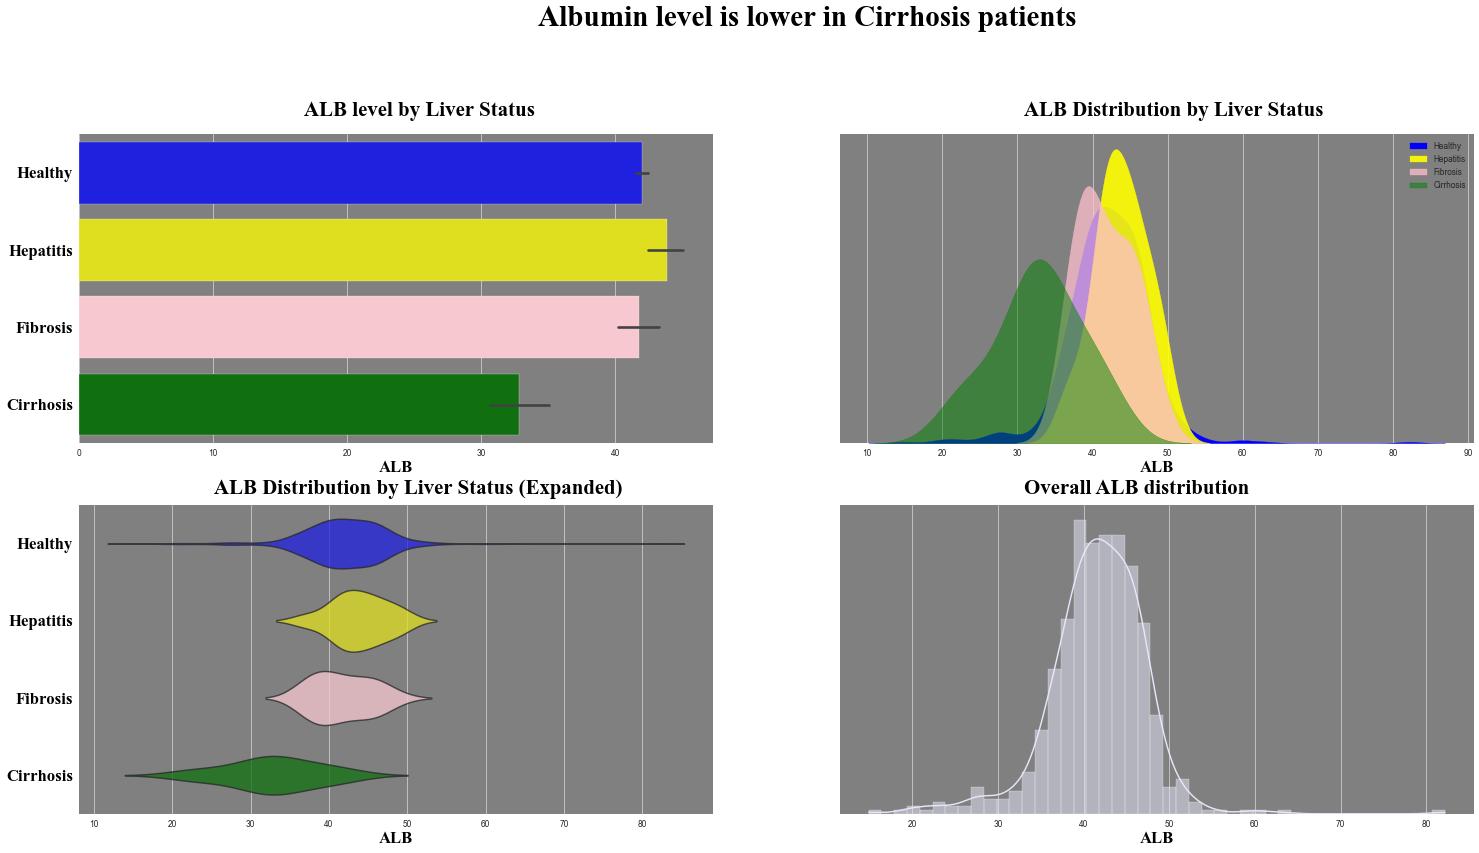

In [12]:
# --- Variable, Color & Plot Size ---
var = 'ALB'
color = green_grad[1]
labels=['Blood Donor', 'Cirrhosis', 'Hepatitis', 'Fibrosis']

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: ALB Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('ALB Column Distribution', fontweight='bold', fontsize=16, 
             fontfamily='times new roman', color=black_grad[0])
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=1, hspace=3)
fig.tight_layout()

# --- Plot dimensions ---
fig = plt.figure(figsize = (30, 15), dpi = 60)
sns.set_palette(sns.color_palette(['blue','yellow', 'pink', 'green']))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# axes list
axes = [ ax1, ax2, ax3, ax4]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('grey')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)
        
#-------Barplot------------------------------------------------
sns.barplot(x=df[var], y=df['Category'], ax=ax1,)
ax1.axes.get_yaxis().set_visible(True)
ax1.set_ylabel('')
ax1.set_yticklabels( labels = ['Healthy', 'Hepatitis', 'Fibrosis', 'Cirrhosis'], fontdict = {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})
ax1.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})

#-------Kernel Distribution wrt Disease status------------------------------------------------
sns.kdeplot(var, data=df[df.Category=='Healthy'], ax=ax2, shade=True, color='blue', alpha=1, label='Healthy')
sns.kdeplot(var, data=df[df.Category=='Hepatitis'], ax=ax2, shade=True, color='yellow', alpha=0.9, label='Hepatitis')
sns.kdeplot(var, data=df[df.Category=='Fibrosis'], ax=ax2, shade=True, color='pink',  alpha=0.75, label='Fibrosis')
sns.kdeplot(var, data=df[df.Category=='Cirrhosis'], ax=ax2, shade=True, color='green', alpha=0.5,  label='Cirrhosis')
ax2.legend()
ax2.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})


#-------Violin plot------------------------------------------------
ax3_plot = sns.violinplot(x=var, y='Category', data=df,  ax=ax3, aspect=2, inner=None)
for item in ax3_plot.collections[::]:
    item.set_alpha(0.75)
ax3.axes.get_yaxis().set_visible(True)
ax3.set_ylabel('')
ax3.set_yticklabels( labels = ['Healthy', 'Hepatitis', 'Fibrosis', 'Cirrhosis'],
                fontdict = {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})
ax3.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})


#-------Histogram------------------------------------------------
ax4_plot = sns.histplot(data=df, x= var, color='Lavender', kde=True)
ax4.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})

#----------Axes titles------------------------------------------------------------------

#ax1
fig.text(0.25, 0.9, "ALB level by Liver Status",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax2
fig.text(0.65, 0.9, "ALB Distribution by Liver Status",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax3
fig.text(0.2, 0.48, "ALB Distribution by Liver Status (Expanded)",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})

#ax4
fig.text(0.65, 0.48, "Overall ALB distribution",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})

#title
fig.text(0.38, 1, "Albumin level is lower in Cirrhosis patients",
        {'font':'Times New Roman', 'fontsize':35,'fontweight':'bold', 'color':'black'})

plt.show()

.: ALP Column Skewness & Kurtosis :.
****************************************
Skewness: 4.730
Kurtosis: 56.730




<Figure size 800x550 with 0 Axes>

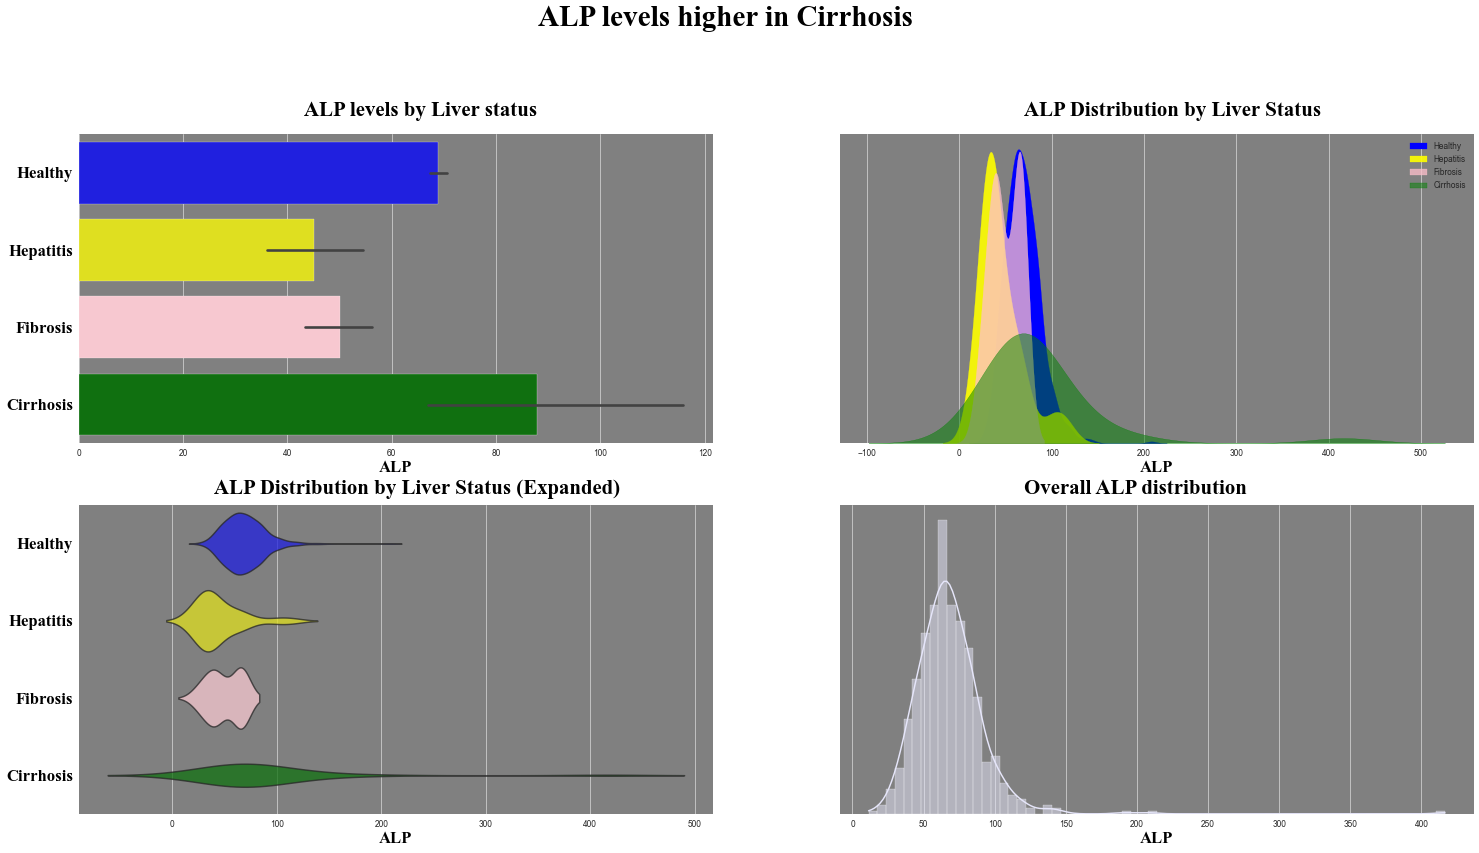

In [13]:
# --- Variable, Color & Plot Size ---
var = 'ALP'
color = green_grad[1]
labels=['Blood Donor', 'Cirrhosis', 'Hepatitis', 'Fibrosis']

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: ALP Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('ALP Column Distribution', fontweight='bold', fontsize=16, 
             fontfamily='times new roman', color=black_grad[0])
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=1, hspace=3)
fig.tight_layout()

# --- Plot dimensions ---
fig = plt.figure(figsize = (30, 15), dpi = 60)
sns.set_palette(sns.color_palette(['blue','yellow', 'pink', 'green']))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# axes list
axes = [ ax1, ax2, ax3, ax4]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('grey')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)
        
#-------Barplot------------------------------------------------
sns.barplot(x=df[var], y=df['Category'], ax=ax1,)
ax1.axes.get_yaxis().set_visible(True)
ax1.set_ylabel('')
ax1.set_yticklabels( labels = ['Healthy', 'Hepatitis', 'Fibrosis', 'Cirrhosis'], fontdict = {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})
ax1.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})

#-------Kernel Distribution wrt Disease status------------------------------------------------
sns.kdeplot(var, data=df[df.Category=='Healthy'], ax=ax2, shade=True, color='blue', alpha=1, label='Healthy')
sns.kdeplot(var, data=df[df.Category=='Hepatitis'], ax=ax2, shade=True, color='yellow', alpha=0.9, label='Hepatitis')
sns.kdeplot(var, data=df[df.Category=='Fibrosis'], ax=ax2, shade=True, color='pink',  alpha=0.75, label='Fibrosis')
sns.kdeplot(var, data=df[df.Category=='Cirrhosis'], ax=ax2, shade=True, color='green', alpha=0.5,  label='Cirrhosis')
ax2.legend()
ax2.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})


#-------Violin plot------------------------------------------------
ax3_plot = sns.violinplot(x=var, y='Category', data=df,  ax=ax3, aspect=2, inner=None)
for item in ax3_plot.collections[::]:
    item.set_alpha(0.75)
ax3.axes.get_yaxis().set_visible(True)
ax3.set_ylabel('')
ax3.set_yticklabels( labels = ['Healthy', 'Hepatitis', 'Fibrosis', 'Cirrhosis'],
                fontdict = {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})
ax3.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})


#-------Histogram------------------------------------------------
ax4_plot = sns.histplot(data=df, x= var, color='Lavender', kde=True)
ax4.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})

#----------Axes titles------------------------------------------------------------------

#ax1
fig.text(0.25, 0.9, "ALP levels by Liver status",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax2
fig.text(0.65, 0.9, "ALP Distribution by Liver Status",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax3
fig.text(0.2, 0.48, "ALP Distribution by Liver Status (Expanded)",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})

#ax4
fig.text(0.65, 0.48, "Overall ALP distribution",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})

#title
fig.text(0.38, 1, "ALP levels higher in Cirrhosis ",
        {'font':'Times New Roman', 'fontsize':35,'fontweight':'bold', 'color':'black'})

plt.show()

.: ALT Column Skewness & Kurtosis :.
****************************************
Skewness: 5.511
Kurtosis: 47.211




<Figure size 800x550 with 0 Axes>

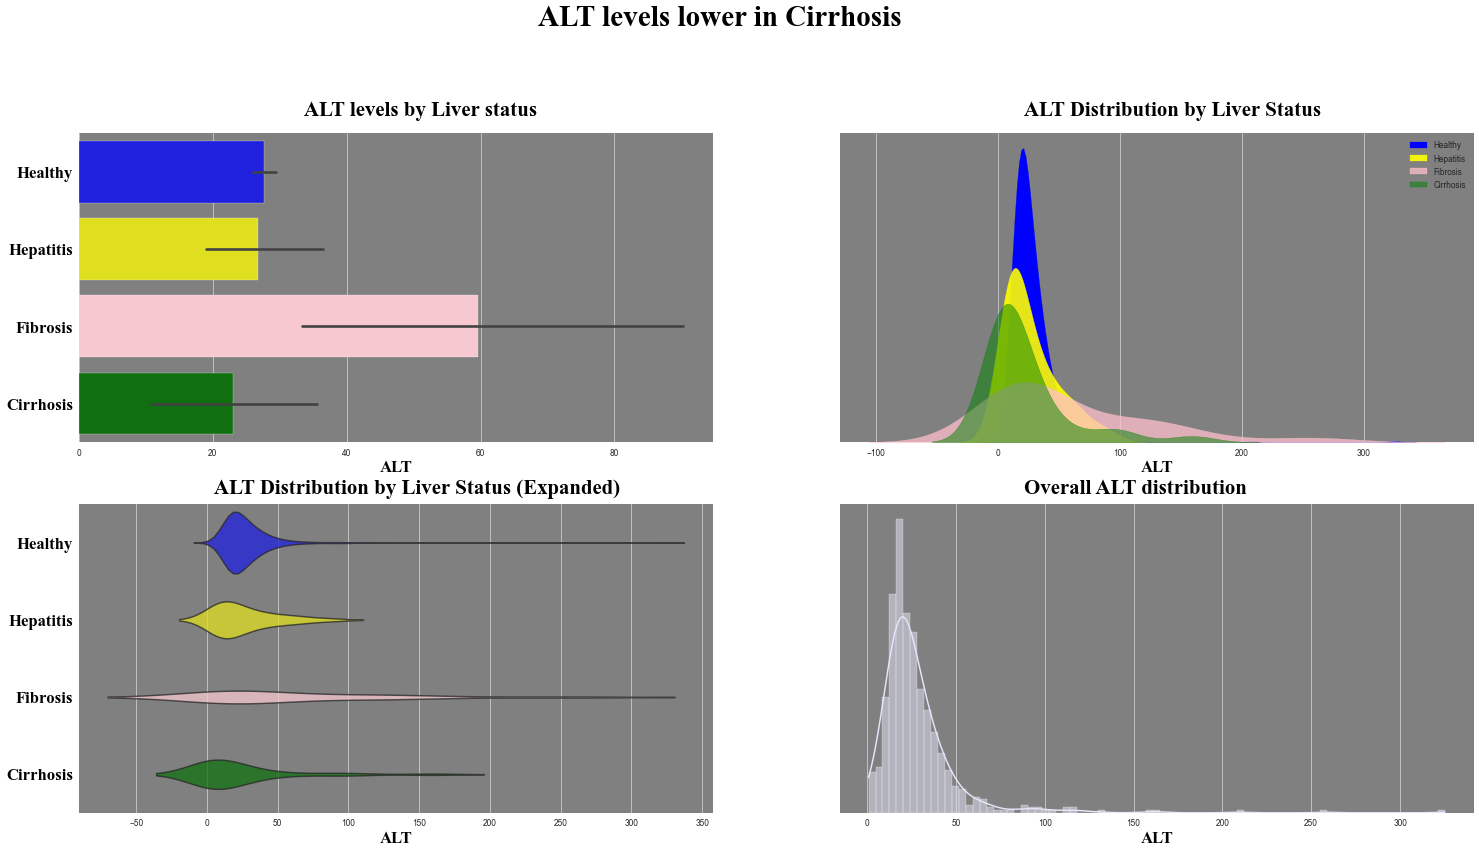

In [14]:
# --- Variable, Color & Plot Size ---
var = 'ALT'
color = green_grad[1]
labels=['Blood Donor', 'Cirrhosis', 'Hepatitis', 'Fibrosis']

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: ALT Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('ALT Column Distribution', fontweight='bold', fontsize=16, 
             fontfamily='times new roman', color=black_grad[0])
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=1, hspace=3)
fig.tight_layout()

# --- Plot dimensions ---
fig = plt.figure(figsize = (30, 15), dpi = 60)
sns.set_palette(sns.color_palette(['blue','yellow', 'pink', 'green']))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# axes list
axes = [ ax1, ax2, ax3, ax4]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('grey')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)
        
#-------Barplot------------------------------------------------
sns.barplot(x=df[var], y=df['Category'], ax=ax1,)
ax1.axes.get_yaxis().set_visible(True)
ax1.set_ylabel('')
ax1.set_yticklabels( labels = ['Healthy', 'Hepatitis', 'Fibrosis', 'Cirrhosis'], fontdict = {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})
ax1.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})

#-------Kernel Distribution wrt Disease status------------------------------------------------
sns.kdeplot(var, data=df[df.Category=='Healthy'], ax=ax2, shade=True, color='blue', alpha=1, label='Healthy')
sns.kdeplot(var, data=df[df.Category=='Hepatitis'], ax=ax2, shade=True, color='yellow', alpha=0.9, label='Hepatitis')
sns.kdeplot(var, data=df[df.Category=='Fibrosis'], ax=ax2, shade=True, color='pink',  alpha=0.75, label='Fibrosis')
sns.kdeplot(var, data=df[df.Category=='Cirrhosis'], ax=ax2, shade=True, color='green', alpha=0.5,  label='Cirrhosis')
ax2.legend()
ax2.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})


#-------Violin plot------------------------------------------------
ax3_plot = sns.violinplot(x=var, y='Category', data=df,  ax=ax3, aspect=2, inner=None)
for item in ax3_plot.collections[::]:
    item.set_alpha(0.75)
ax3.axes.get_yaxis().set_visible(True)
ax3.set_ylabel('')
ax3.set_yticklabels( labels = ['Healthy', 'Hepatitis', 'Fibrosis', 'Cirrhosis'],
                fontdict = {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})
ax3.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})


#-------Histogram------------------------------------------------
ax4_plot = sns.histplot(data=df, x= var, color='Lavender', kde=True)
ax4.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})

#----------Axes titles------------------------------------------------------------------

#ax1
fig.text(0.25, 0.9, "ALT levels by Liver status",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax2
fig.text(0.65, 0.9, "ALT Distribution by Liver Status",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax3
fig.text(0.2, 0.48, "ALT Distribution by Liver Status (Expanded)",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})

#ax4
fig.text(0.65, 0.48, "Overall ALT distribution",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})

#title
fig.text(0.38, 1, "ALT levels lower in Cirrhosis ",
        {'font':'Times New Roman', 'fontsize':35,'fontweight':'bold', 'color':'black'})

plt.show()

.: AST Column Skewness & Kurtosis :.
****************************************
Skewness: 4.940
Kurtosis: 30.837




<Figure size 800x550 with 0 Axes>

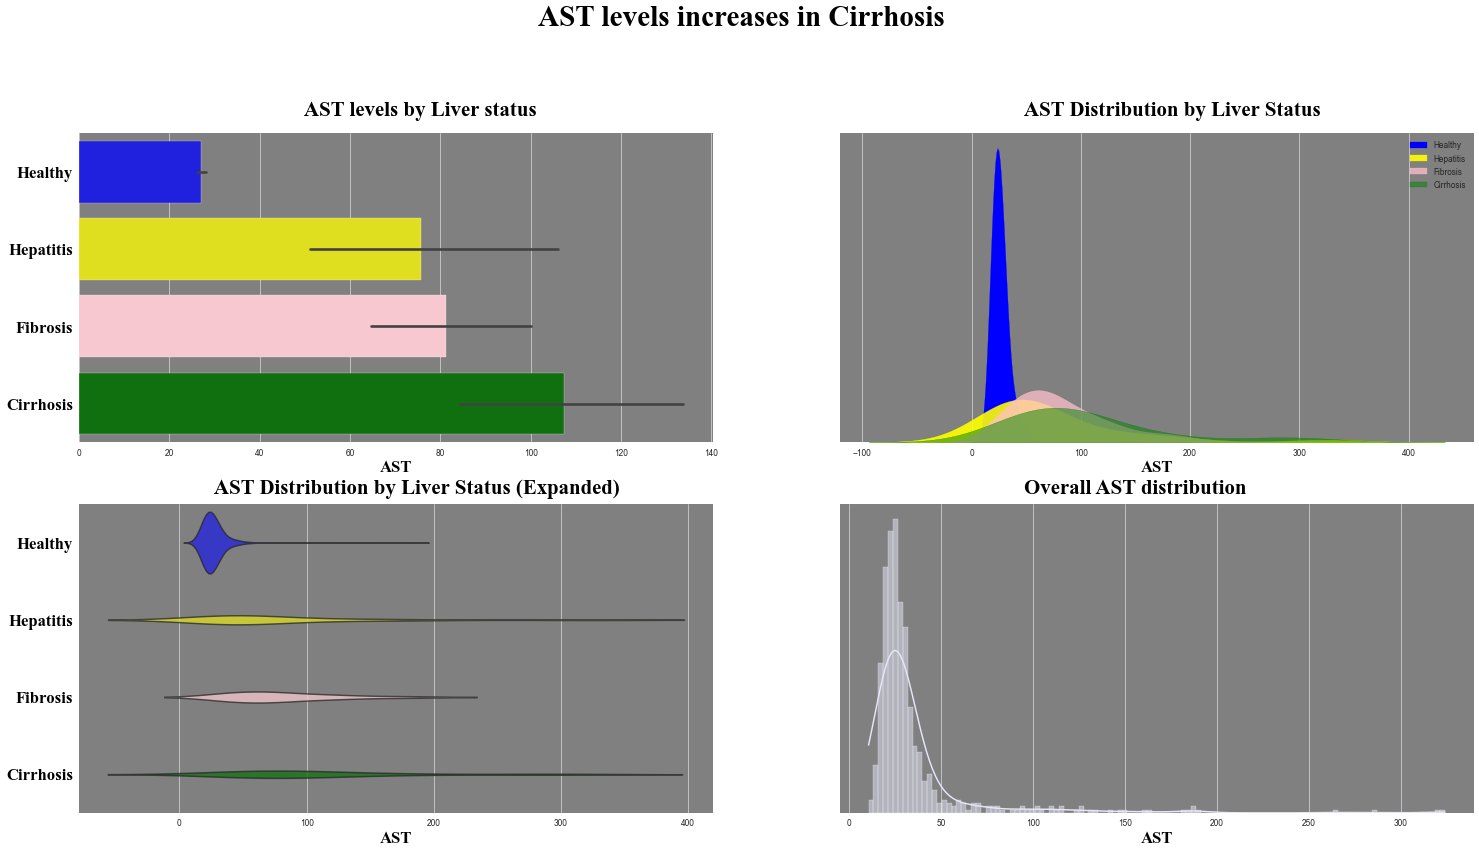

In [15]:
# --- Variable, Color & Plot Size ---
var = 'AST'
color = green_grad[1]
labels=['Blood Donor', 'Cirrhosis', 'Hepatitis', 'Fibrosis']

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: AST Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('AST Column Distribution', fontweight='bold', fontsize=16, 
             fontfamily='times new roman', color=black_grad[0])
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=1, hspace=3)
fig.tight_layout()

# --- Plot dimensions ---
fig = plt.figure(figsize = (30, 15), dpi = 60)
sns.set_palette(sns.color_palette(['blue','yellow', 'pink', 'green']))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# axes list
axes = [ ax1, ax2, ax3, ax4]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('grey')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)
        
#-------Barplot------------------------------------------------
sns.barplot(x=df[var], y=df['Category'], ax=ax1,)
ax1.axes.get_yaxis().set_visible(True)
ax1.set_ylabel('')
ax1.set_yticklabels( labels = ['Healthy', 'Hepatitis', 'Fibrosis', 'Cirrhosis'], fontdict = {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})
ax1.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})

#-------Kernel Distribution wrt Disease status------------------------------------------------
sns.kdeplot(var, data=df[df.Category=='Healthy'], ax=ax2, shade=True, color='blue', alpha=1, label='Healthy')
sns.kdeplot(var, data=df[df.Category=='Hepatitis'], ax=ax2, shade=True, color='yellow', alpha=0.9, label='Hepatitis')
sns.kdeplot(var, data=df[df.Category=='Fibrosis'], ax=ax2, shade=True, color='pink',  alpha=0.75, label='Fibrosis')
sns.kdeplot(var, data=df[df.Category=='Cirrhosis'], ax=ax2, shade=True, color='green', alpha=0.5,  label='Cirrhosis')
ax2.legend()
ax2.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})


#-------Violin plot------------------------------------------------
ax3_plot = sns.violinplot(x=var, y='Category', data=df,  ax=ax3, aspect=2, inner=None)
for item in ax3_plot.collections[::]:
    item.set_alpha(0.75)
ax3.axes.get_yaxis().set_visible(True)
ax3.set_ylabel('')
ax3.set_yticklabels( labels = ['Healthy', 'Hepatitis', 'Fibrosis', 'Cirrhosis'],
                fontdict = {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})
ax3.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})


#-------Histogram------------------------------------------------
ax4_plot = sns.histplot(data=df, x= var, color='Lavender', kde=True)
ax4.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})

#----------Axes titles------------------------------------------------------------------

#ax1
fig.text(0.25, 0.9, "AST levels by Liver status",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax2
fig.text(0.65, 0.9, "AST Distribution by Liver Status",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax3
fig.text(0.2, 0.48, "AST Distribution by Liver Status (Expanded)",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})

#ax4
fig.text(0.65, 0.48, "Overall AST distribution",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})

#title
fig.text(0.38, 1, "AST levels increases in Cirrhosis ",
        {'font':'Times New Roman', 'fontsize':35,'fontweight':'bold', 'color':'black'})

plt.show()

.: Bilurubin Column Skewness & Kurtosis :.
****************************************
Skewness: 8.385
Kurtosis: 83.187




<Figure size 800x550 with 0 Axes>

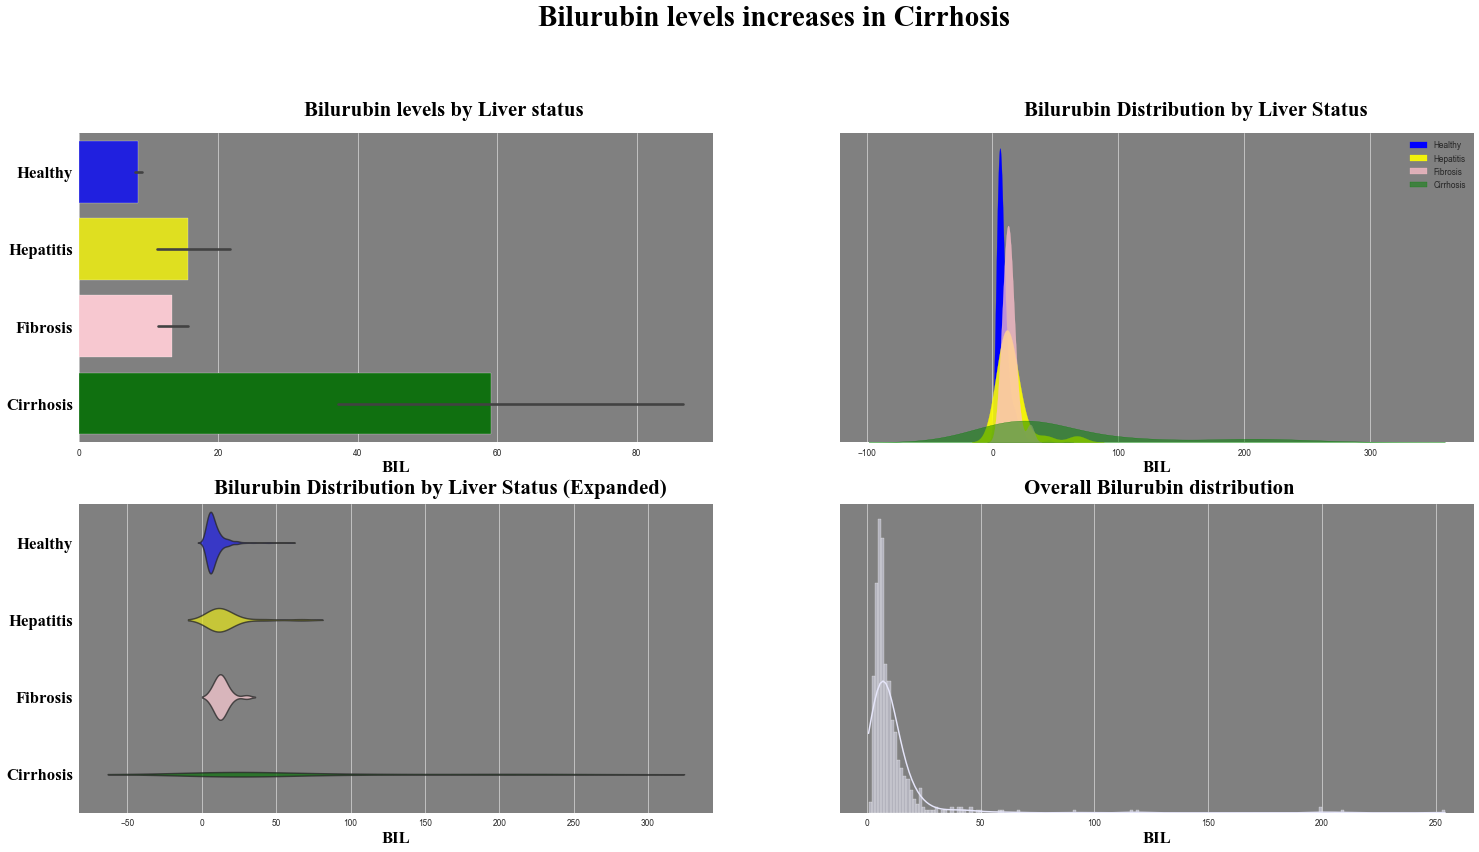

In [16]:
# --- Variable, Color & Plot Size ---
var = 'BIL'
color = green_grad[1]
labels=['Blood Donor', 'Cirrhosis', 'Hepatitis', 'Fibrosis']

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Bilurubin Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Bilurubin Column Distribution', fontweight='bold', fontsize=16, 
             fontfamily='times new roman', color=black_grad[0])
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=1, hspace=3)
fig.tight_layout()

# --- Plot dimensions ---
fig = plt.figure(figsize = (30, 15), dpi = 60)
sns.set_palette(sns.color_palette(['blue','yellow', 'pink', 'green']))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# axes list
axes = [ ax1, ax2, ax3, ax4]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('grey')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)
        
#-------Barplot------------------------------------------------
sns.barplot(x=df[var], y=df['Category'], ax=ax1,)
ax1.axes.get_yaxis().set_visible(True)
ax1.set_ylabel('')
ax1.set_yticklabels( labels = ['Healthy', 'Hepatitis', 'Fibrosis', 'Cirrhosis'], fontdict = {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})
ax1.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})

#-------Kernel Distribution wrt Disease status------------------------------------------------
sns.kdeplot(var, data=df[df.Category=='Healthy'], ax=ax2, shade=True, color='blue', alpha=1, label='Healthy')
sns.kdeplot(var, data=df[df.Category=='Hepatitis'], ax=ax2, shade=True, color='yellow', alpha=0.9, label='Hepatitis')
sns.kdeplot(var, data=df[df.Category=='Fibrosis'], ax=ax2, shade=True, color='pink',  alpha=0.75, label='Fibrosis')
sns.kdeplot(var, data=df[df.Category=='Cirrhosis'], ax=ax2, shade=True, color='green', alpha=0.5,  label='Cirrhosis')
ax2.legend()
ax2.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})


#-------Violin plot------------------------------------------------
ax3_plot = sns.violinplot(x=var, y='Category', data=df,  ax=ax3, aspect=2, inner=None)
for item in ax3_plot.collections[::]:
    item.set_alpha(0.75)
ax3.axes.get_yaxis().set_visible(True)
ax3.set_ylabel('')
ax3.set_yticklabels( labels = ['Healthy', 'Hepatitis', 'Fibrosis', 'Cirrhosis'],
                fontdict = {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})
ax3.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})


#-------Histogram------------------------------------------------
ax4_plot = sns.histplot(data=df, x= var, color='Lavender', kde=True)
ax4.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})

#----------Axes titles------------------------------------------------------------------

#ax1
fig.text(0.25, 0.9, "Bilurubin levels by Liver status",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax2
fig.text(0.65, 0.9, "Bilurubin Distribution by Liver Status",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax3
fig.text(0.2, 0.48, "Bilurubin Distribution by Liver Status (Expanded)",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})

#ax4
fig.text(0.65, 0.48, "Overall Bilurubin distribution",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})

#title
fig.text(0.38, 1, "Bilurubin levels increases in Cirrhosis ",
        {'font':'Times New Roman', 'fontsize':35,'fontweight':'bold', 'color':'black'})

plt.show()

.: Cholinesterase Column Skewness & Kurtosis :.
****************************************
Skewness: -0.110
Kurtosis: 1.315




<Figure size 800x550 with 0 Axes>

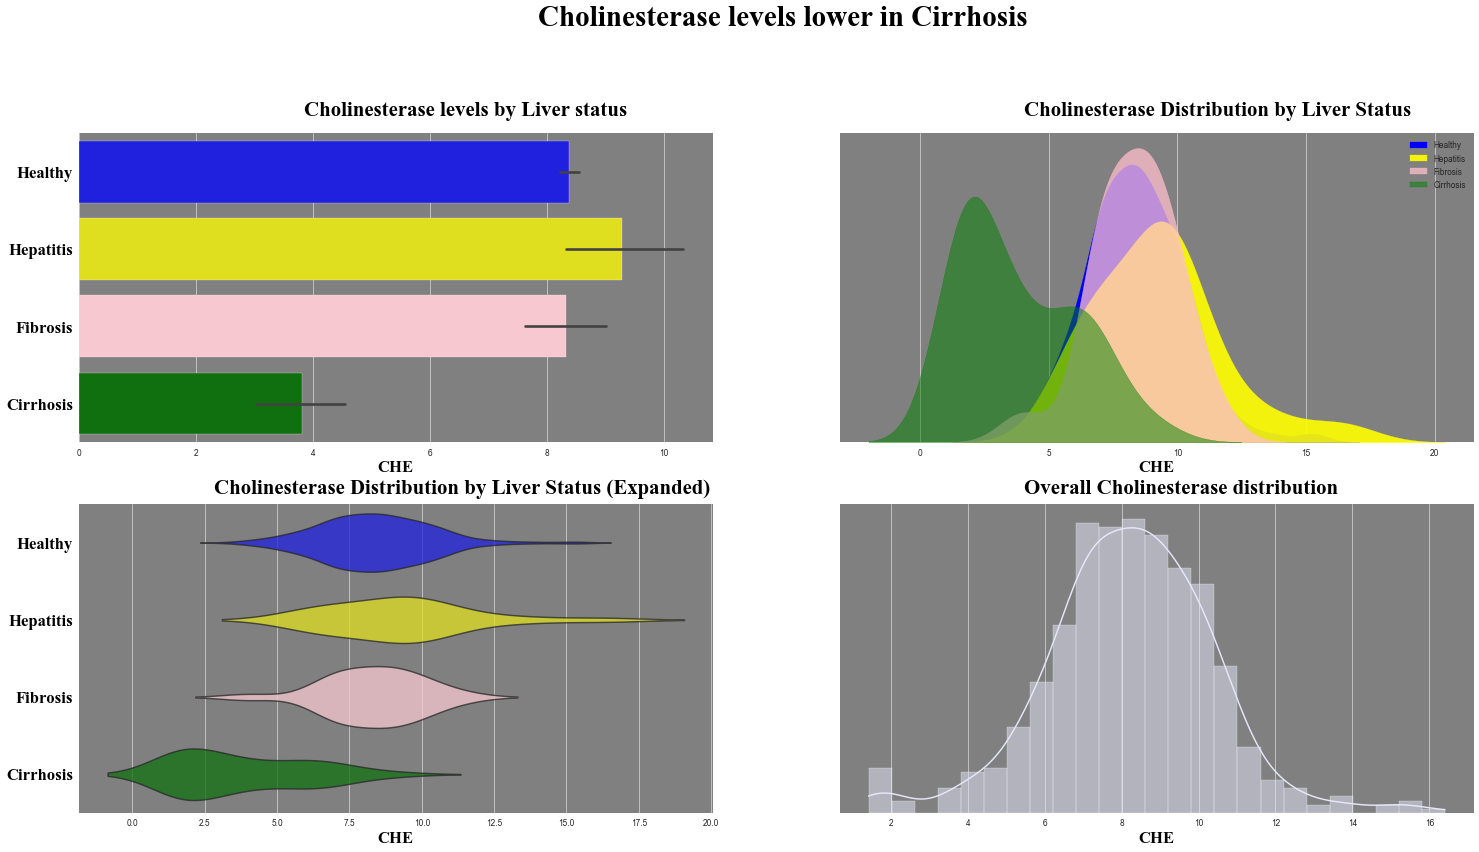

In [17]:
# --- Variable, Color & Plot Size ---
var = 'CHE'
color = green_grad[1]
labels=['Blood Donor', 'Cirrhosis', 'Hepatitis', 'Fibrosis']

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Cholinesterase Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Cholinesterase Column Distribution', fontweight='bold', fontsize=16, 
             fontfamily='times new roman', color=black_grad[0])
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=1, hspace=3)
fig.tight_layout()

# --- Plot dimensions ---
fig = plt.figure(figsize = (30, 15), dpi = 60)
sns.set_palette(sns.color_palette(['blue','yellow', 'pink', 'green']))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# axes list
axes = [ ax1, ax2, ax3, ax4]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('grey')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)
        
#-------Barplot------------------------------------------------
sns.barplot(x=df[var], y=df['Category'], ax=ax1,)
ax1.axes.get_yaxis().set_visible(True)
ax1.set_ylabel('')
ax1.set_yticklabels( labels = ['Healthy', 'Hepatitis', 'Fibrosis', 'Cirrhosis'], fontdict = {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})
ax1.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})

#-------Kernel Distribution wrt Disease status------------------------------------------------
sns.kdeplot(var, data=df[df.Category=='Healthy'], ax=ax2, shade=True, color='blue', alpha=1, label='Healthy')
sns.kdeplot(var, data=df[df.Category=='Hepatitis'], ax=ax2, shade=True, color='yellow', alpha=0.9, label='Hepatitis')
sns.kdeplot(var, data=df[df.Category=='Fibrosis'], ax=ax2, shade=True, color='pink',  alpha=0.75, label='Fibrosis')
sns.kdeplot(var, data=df[df.Category=='Cirrhosis'], ax=ax2, shade=True, color='green', alpha=0.5,  label='Cirrhosis')
ax2.legend()
ax2.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})


#-------Violin plot------------------------------------------------
ax3_plot = sns.violinplot(x=var, y='Category', data=df,  ax=ax3, aspect=2, inner=None)
for item in ax3_plot.collections[::]:
    item.set_alpha(0.75)
ax3.axes.get_yaxis().set_visible(True)
ax3.set_ylabel('')
ax3.set_yticklabels( labels = ['Healthy', 'Hepatitis', 'Fibrosis', 'Cirrhosis'],
                fontdict = {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})
ax3.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})


#-------Histogram------------------------------------------------
ax4_plot = sns.histplot(data=df, x= var, color='Lavender', kde=True)
ax4.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})

#----------Axes titles------------------------------------------------------------------

#ax1
fig.text(0.25, 0.9, "Cholinesterase levels by Liver status",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax2
fig.text(0.65, 0.9, "Cholinesterase Distribution by Liver Status",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax3
fig.text(0.2, 0.48, "Cholinesterase Distribution by Liver Status (Expanded)",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})

#ax4
fig.text(0.65, 0.48, "Overall Cholinesterase distribution",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})

#title
fig.text(0.38, 1, "Cholinesterase levels lower in Cirrhosis ",
        {'font':'Times New Roman', 'fontsize':35,'fontweight':'bold', 'color':'black'})

plt.show()

.: Cholesterol Column Skewness & Kurtosis :.
****************************************
Skewness: 0.382
Kurtosis: 0.756




<Figure size 800x550 with 0 Axes>

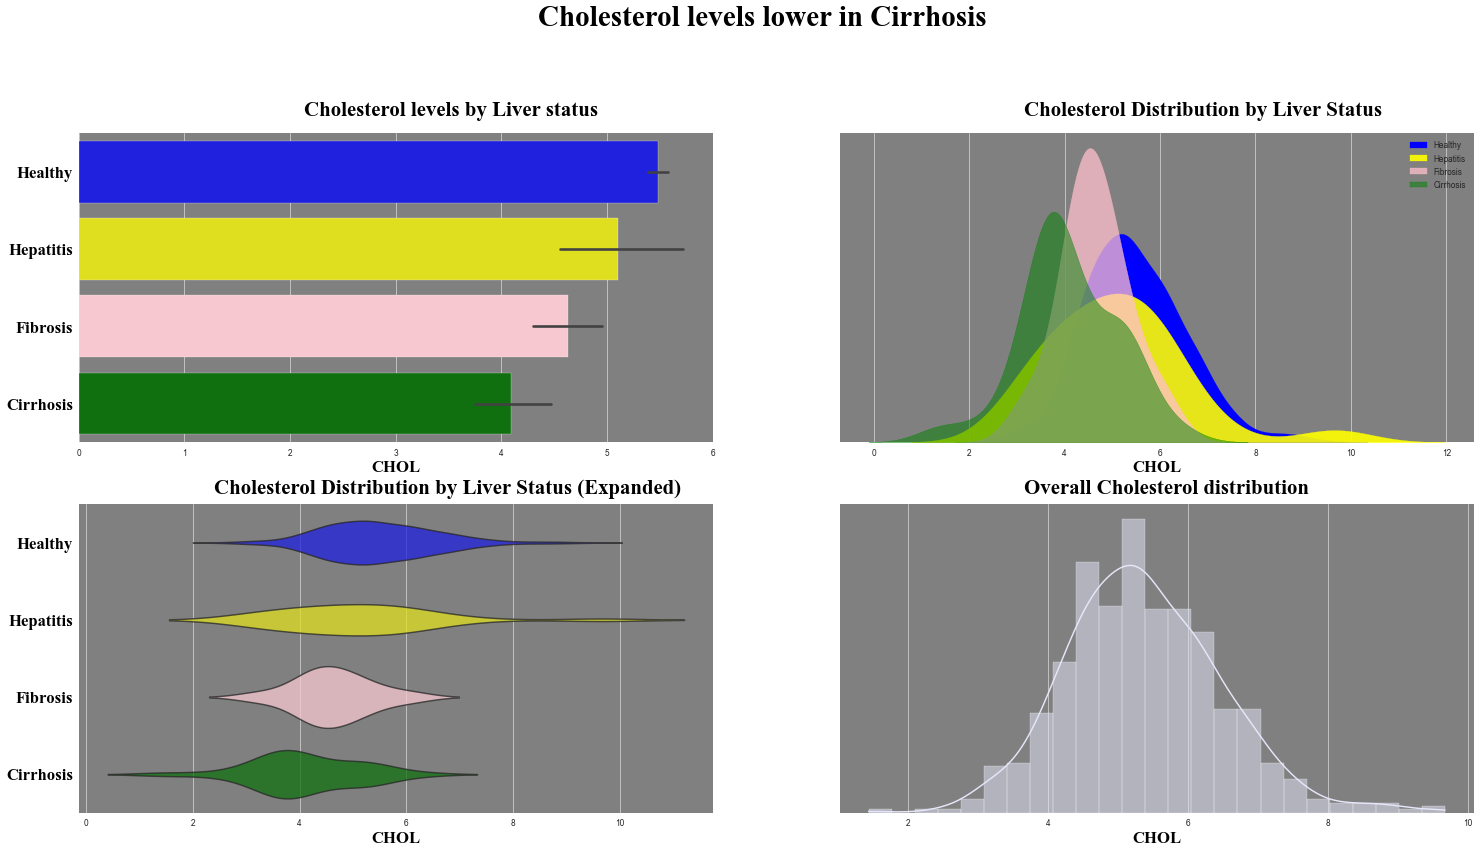

In [18]:
# --- Variable, Color & Plot Size ---
var = 'CHOL'
color = green_grad[1]
labels=['Blood Donor', 'Cirrhosis', 'Hepatitis', 'Fibrosis']

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Cholesterol Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Cholesterol Column Distribution', fontweight='bold', fontsize=16, 
             fontfamily='times new roman', color=black_grad[0])
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=1, hspace=3)
fig.tight_layout()

# --- Plot dimensions ---
fig = plt.figure(figsize = (30, 15), dpi = 60)
sns.set_palette(sns.color_palette(['blue','yellow', 'pink', 'green']))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# axes list
axes = [ ax1, ax2, ax3, ax4]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('grey')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)
        
#-------Barplot------------------------------------------------
sns.barplot(x=df[var], y=df['Category'], ax=ax1,)
ax1.axes.get_yaxis().set_visible(True)
ax1.set_ylabel('')
ax1.set_yticklabels( labels = ['Healthy', 'Hepatitis', 'Fibrosis', 'Cirrhosis'], fontdict = {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})
ax1.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})

#-------Kernel Distribution wrt Disease status------------------------------------------------
sns.kdeplot(var, data=df[df.Category=='Healthy'], ax=ax2, shade=True, color='blue', alpha=1, label='Healthy')
sns.kdeplot(var, data=df[df.Category=='Hepatitis'], ax=ax2, shade=True, color='yellow', alpha=0.9, label='Hepatitis')
sns.kdeplot(var, data=df[df.Category=='Fibrosis'], ax=ax2, shade=True, color='pink',  alpha=0.75, label='Fibrosis')
sns.kdeplot(var, data=df[df.Category=='Cirrhosis'], ax=ax2, shade=True, color='green', alpha=0.5,  label='Cirrhosis')
ax2.legend()
ax2.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})


#-------Violin plot------------------------------------------------
ax3_plot = sns.violinplot(x=var, y='Category', data=df,  ax=ax3, aspect=2, inner=None)
for item in ax3_plot.collections[::]:
    item.set_alpha(0.75)
ax3.axes.get_yaxis().set_visible(True)
ax3.set_ylabel('')
ax3.set_yticklabels( labels = ['Healthy', 'Hepatitis', 'Fibrosis', 'Cirrhosis'],
                fontdict = {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})
ax3.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})


#-------Histogram------------------------------------------------
ax4_plot = sns.histplot(data=df, x= var, color='Lavender', kde=True)
ax4.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})

#----------Axes titles------------------------------------------------------------------

#ax1
fig.text(0.25, 0.9, "Cholesterol levels by Liver status",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax2
fig.text(0.65, 0.9, "Cholesterol Distribution by Liver Status",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax3
fig.text(0.2, 0.48, "Cholesterol Distribution by Liver Status (Expanded)",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})

#ax4
fig.text(0.65, 0.48, "Overall Cholesterol distribution",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})

#title
fig.text(0.38, 1, "Cholesterol levels lower in Cirrhosis ",
        {'font':'Times New Roman', 'fontsize':35,'fontweight':'bold', 'color':'black'})

plt.show()

.: Creatinine Column Skewness & Kurtosis :.
****************************************
Skewness: 15.169
Kurtosis: 280.100




<Figure size 800x550 with 0 Axes>

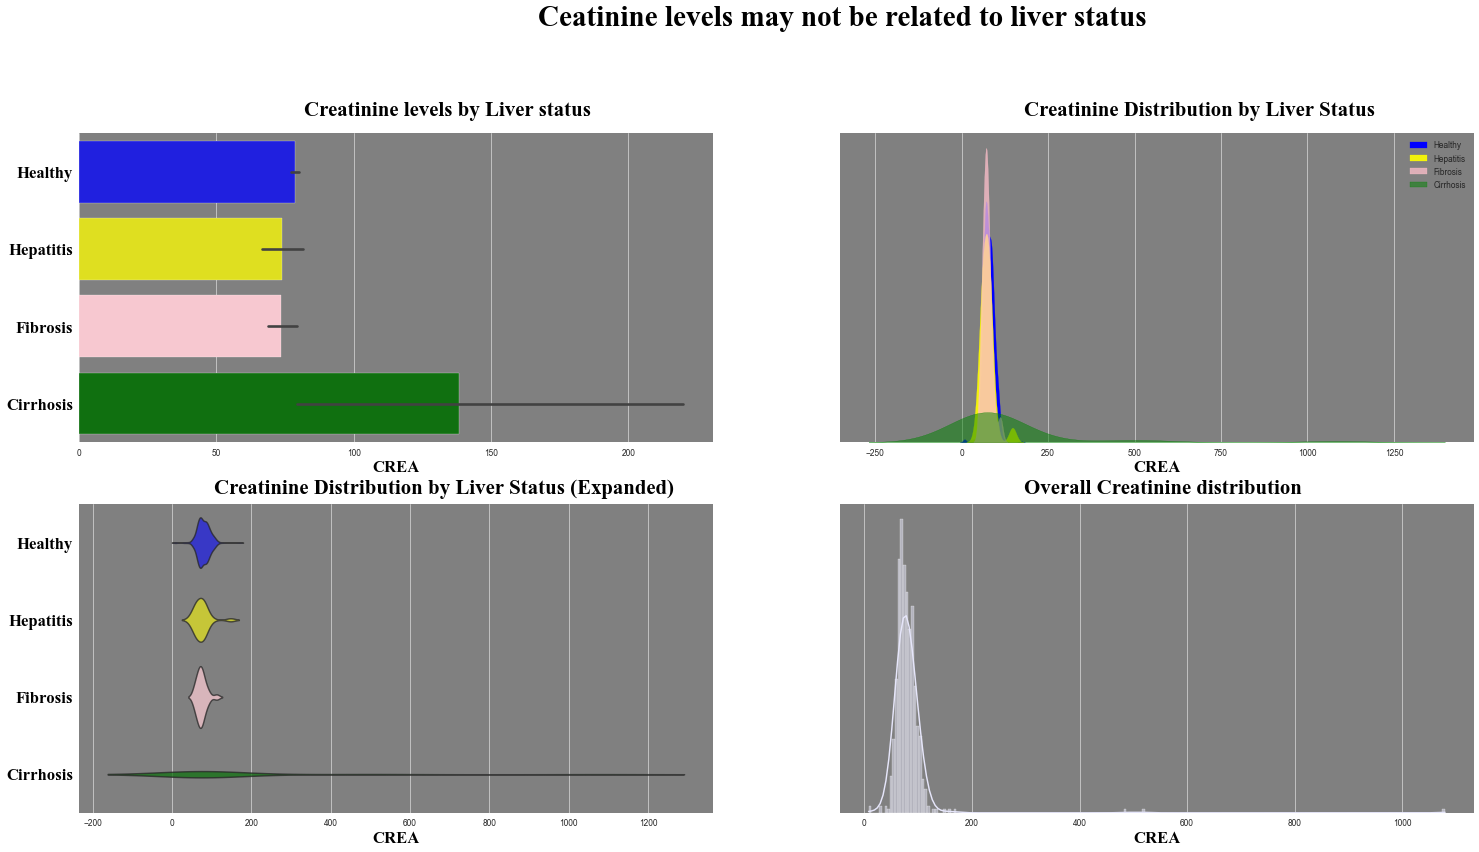

In [19]:
# --- Variable, Color & Plot Size ---
var = 'CREA'
color = green_grad[1]
labels=['Blood Donor', 'Cirrhosis', 'Hepatitis', 'Fibrosis']

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Creatinine Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Creatinine Column Distribution', fontweight='bold', fontsize=16, 
             fontfamily='times new roman', color=black_grad[0])
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=1, hspace=3)
fig.tight_layout()

# --- Plot dimensions ---
fig = plt.figure(figsize = (30, 15), dpi = 60)
sns.set_palette(sns.color_palette(['blue','yellow', 'pink', 'green']))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# axes list
axes = [ ax1, ax2, ax3, ax4]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('grey')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)
        
#-------Barplot------------------------------------------------
sns.barplot(x=df[var], y=df['Category'], ax=ax1,)
ax1.axes.get_yaxis().set_visible(True)
ax1.set_ylabel('')
ax1.set_yticklabels( labels = ['Healthy', 'Hepatitis', 'Fibrosis', 'Cirrhosis'], fontdict = {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})
ax1.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})

#-------Kernel Distribution wrt Disease status------------------------------------------------
sns.kdeplot(var, data=df[df.Category=='Healthy'], ax=ax2, shade=True, color='blue', alpha=1, label='Healthy')
sns.kdeplot(var, data=df[df.Category=='Hepatitis'], ax=ax2, shade=True, color='yellow', alpha=0.9, label='Hepatitis')
sns.kdeplot(var, data=df[df.Category=='Fibrosis'], ax=ax2, shade=True, color='pink',  alpha=0.75, label='Fibrosis')
sns.kdeplot(var, data=df[df.Category=='Cirrhosis'], ax=ax2, shade=True, color='green', alpha=0.5,  label='Cirrhosis')
ax2.legend()
ax2.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})


#-------Violin plot------------------------------------------------
ax3_plot = sns.violinplot(x=var, y='Category', data=df,  ax=ax3, aspect=2, inner=None)
for item in ax3_plot.collections[::]:
    item.set_alpha(0.75)
ax3.axes.get_yaxis().set_visible(True)
ax3.set_ylabel('')
ax3.set_yticklabels( labels = ['Healthy', 'Hepatitis', 'Fibrosis', 'Cirrhosis'],
                fontdict = {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})
ax3.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})


#-------Histogram------------------------------------------------
ax4_plot = sns.histplot(data=df, x= var, color='Lavender', kde=True)
ax4.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})

#----------Axes titles------------------------------------------------------------------

#ax1
fig.text(0.25, 0.9, "Creatinine levels by Liver status",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax2
fig.text(0.65, 0.9, "Creatinine Distribution by Liver Status",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax3
fig.text(0.2, 0.48, "Creatinine Distribution by Liver Status (Expanded)",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})

#ax4
fig.text(0.65, 0.48, "Overall Creatinine distribution",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})

#title
fig.text(0.38, 1, "Ceatinine levels may not be related to liver status ",
        {'font':'Times New Roman', 'fontsize':35,'fontweight':'bold', 'color':'black'})

plt.show()

.: Gamma Glutamyl transferase Column Skewness & Kurtosis :.
****************************************
Skewness: 5.633
Kurtosis: 43.713




<Figure size 800x550 with 0 Axes>

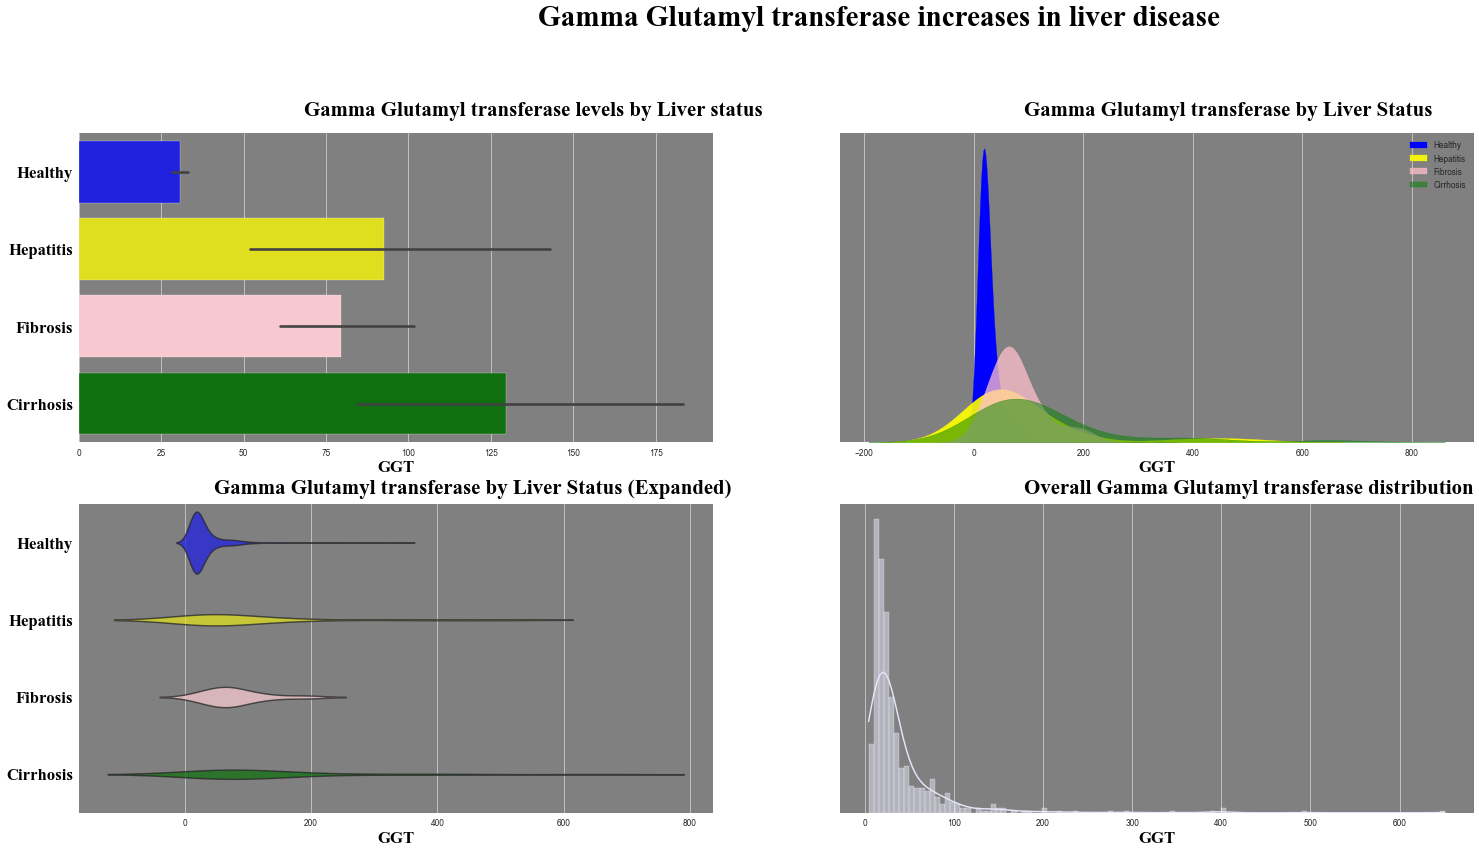

In [20]:
# --- Variable, Color & Plot Size ---
var = 'GGT'
color = green_grad[1]
labels=['Blood Donor', 'Cirrhosis', 'Hepatitis', 'Fibrosis']

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Gamma Glutamyl transferase Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Gamma Glutamyl transferase Column Distribution', fontweight='bold', fontsize=16, 
             fontfamily='times new roman', color=black_grad[0])
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=1, hspace=3)
fig.tight_layout()

# --- Plot dimensions ---
fig = plt.figure(figsize = (30, 15), dpi = 60)
sns.set_palette(sns.color_palette(['blue','yellow', 'pink', 'green']))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# axes list
axes = [ ax1, ax2, ax3, ax4]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('grey')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)
        
#-------Barplot------------------------------------------------
sns.barplot(x=df[var], y=df['Category'], ax=ax1,)
ax1.axes.get_yaxis().set_visible(True)
ax1.set_ylabel('')
ax1.set_yticklabels( labels = ['Healthy', 'Hepatitis', 'Fibrosis', 'Cirrhosis'], fontdict = {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})
ax1.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})

#-------Kernel Distribution wrt Disease status------------------------------------------------
sns.kdeplot(var, data=df[df.Category=='Healthy'], ax=ax2, shade=True, color='blue', alpha=1, label='Healthy')
sns.kdeplot(var, data=df[df.Category=='Hepatitis'], ax=ax2, shade=True, color='yellow', alpha=0.9, label='Hepatitis')
sns.kdeplot(var, data=df[df.Category=='Fibrosis'], ax=ax2, shade=True, color='pink',  alpha=0.75, label='Fibrosis')
sns.kdeplot(var, data=df[df.Category=='Cirrhosis'], ax=ax2, shade=True, color='green', alpha=0.5,  label='Cirrhosis')
ax2.legend()
ax2.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})


#-------Violin plot------------------------------------------------
ax3_plot = sns.violinplot(x=var, y='Category', data=df,  ax=ax3, aspect=2, inner=None)
for item in ax3_plot.collections[::]:
    item.set_alpha(0.75)
ax3.axes.get_yaxis().set_visible(True)
ax3.set_ylabel('')
ax3.set_yticklabels( labels = ['Healthy', 'Hepatitis', 'Fibrosis', 'Cirrhosis'],
                fontdict = {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})
ax3.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})


#-------Histogram------------------------------------------------
ax4_plot = sns.histplot(data=df, x= var, color='Lavender', kde=True)
ax4.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})

#----------Axes titles------------------------------------------------------------------

#ax1
fig.text(0.25, 0.9, "Gamma Glutamyl transferase levels by Liver status",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax2
fig.text(0.65, 0.9, "Gamma Glutamyl transferase by Liver Status",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax3
fig.text(0.2, 0.48, "Gamma Glutamyl transferase by Liver Status (Expanded)",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})

#ax4
fig.text(0.65, 0.48, "Overall Gamma Glutamyl transferase distribution",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})

#title
fig.text(0.38, 1, "Gamma Glutamyl transferase increases in liver disease",
        {'font':'Times New Roman', 'fontsize':35,'fontweight':'bold', 'color':'black'})

plt.show()

.: Protein Column Skewness & Kurtosis :.
****************************************
Skewness: -0.965
Kurtosis: 3.555




<Figure size 800x550 with 0 Axes>

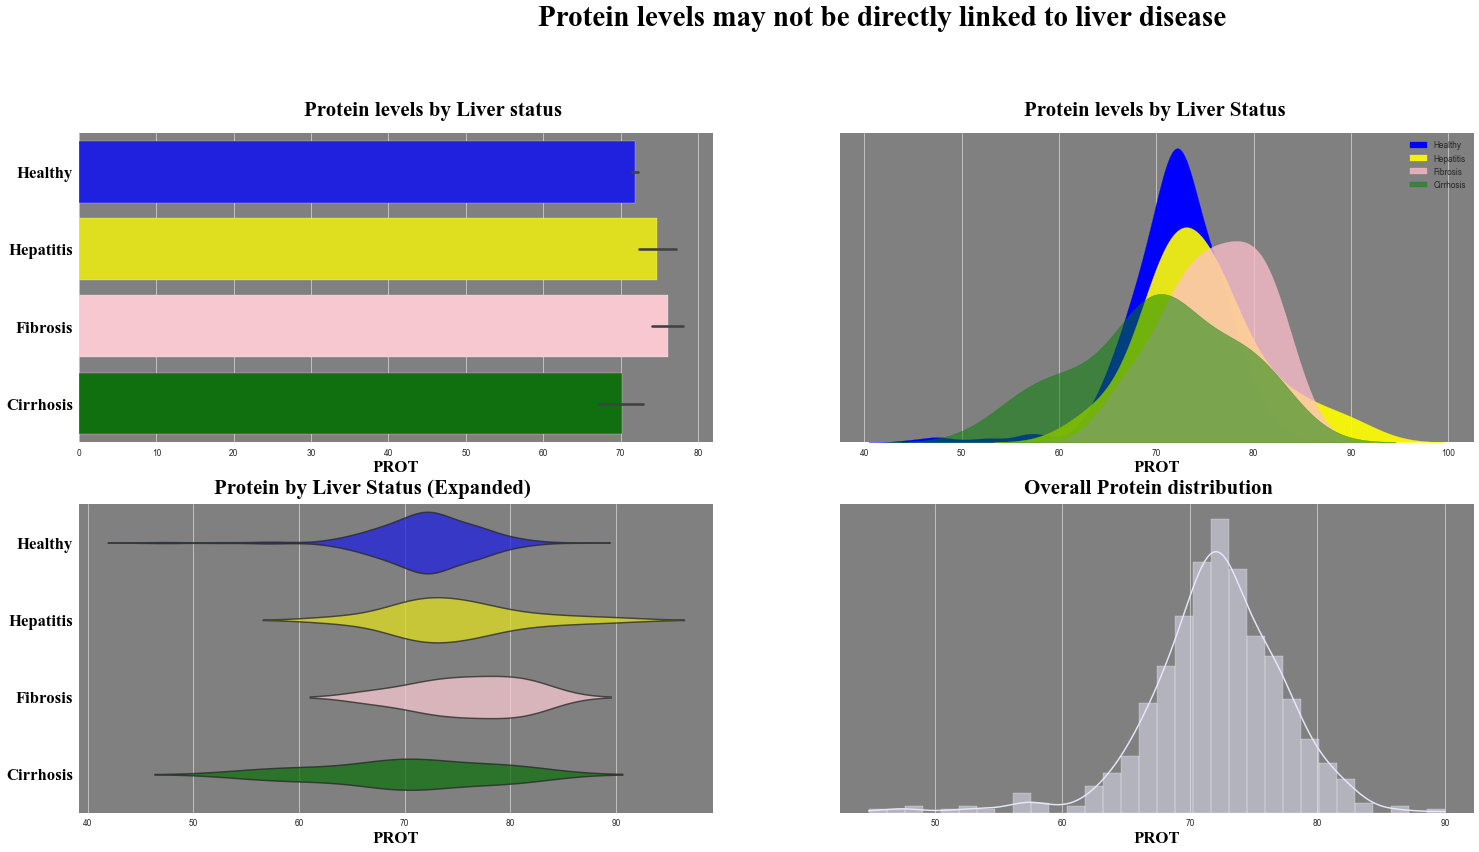

In [21]:
# --- Variable, Color & Plot Size ---
var = 'PROT'
color = green_grad[1]
labels=['Blood Donor', 'Cirrhosis', 'Hepatitis', 'Fibrosis']

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Protein Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Protein Column Distribution', fontweight='bold', fontsize=16, 
             fontfamily='times new roman', color=black_grad[0])
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=1, hspace=3)
fig.tight_layout()

# --- Plot dimensions ---
fig = plt.figure(figsize = (30, 15), dpi = 60)
sns.set_palette(sns.color_palette(['blue','yellow', 'pink', 'green']))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# axes list
axes = [ ax1, ax2, ax3, ax4]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('grey')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)
        
#-------Barplot------------------------------------------------
sns.barplot(x=df[var], y=df['Category'], ax=ax1,)
ax1.axes.get_yaxis().set_visible(True)
ax1.set_ylabel('')
ax1.set_yticklabels( labels = ['Healthy', 'Hepatitis', 'Fibrosis', 'Cirrhosis'], fontdict = {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})
ax1.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})

#-------Kernel Distribution wrt Disease status------------------------------------------------
sns.kdeplot(var, data=df[df.Category=='Healthy'], ax=ax2, shade=True, color='blue', alpha=1, label='Healthy')
sns.kdeplot(var, data=df[df.Category=='Hepatitis'], ax=ax2, shade=True, color='yellow', alpha=0.9, label='Hepatitis')
sns.kdeplot(var, data=df[df.Category=='Fibrosis'], ax=ax2, shade=True, color='pink',  alpha=0.75, label='Fibrosis')
sns.kdeplot(var, data=df[df.Category=='Cirrhosis'], ax=ax2, shade=True, color='green', alpha=0.5,  label='Cirrhosis')
ax2.legend()
ax2.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})


#-------Violin plot------------------------------------------------
ax3_plot = sns.violinplot(x=var, y='Category', data=df,  ax=ax3, aspect=2, inner=None)
for item in ax3_plot.collections[::]:
    item.set_alpha(0.75)
ax3.axes.get_yaxis().set_visible(True)
ax3.set_ylabel('')
ax3.set_yticklabels( labels = ['Healthy', 'Hepatitis', 'Fibrosis', 'Cirrhosis'],
                fontdict = {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})
ax3.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})


#-------Histogram------------------------------------------------
ax4_plot = sns.histplot(data=df, x= var, color='Lavender', kde=True)
ax4.set_xlabel(var, {'font':'Times New Roman', 'fontsize':20,'fontweight':'bold', 'color':'black'})

#----------Axes titles------------------------------------------------------------------

#ax1
fig.text(0.25, 0.9, "Protein levels by Liver status",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax2
fig.text(0.65, 0.9, "Protein levels by Liver Status",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax3
fig.text(0.2, 0.48, "Protein by Liver Status (Expanded)",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})

#ax4
fig.text(0.65, 0.48, "Overall Protein distribution",
        {'font':'Times New Roman', 'fontsize':25,'fontweight':'bold', 'color':'black'})

#title
fig.text(0.38, 1, "Protein levels may not be directly linked to liver disease",
        {'font':'Times New Roman', 'fontsize':35,'fontweight':'bold', 'color':'black'})

plt.show()

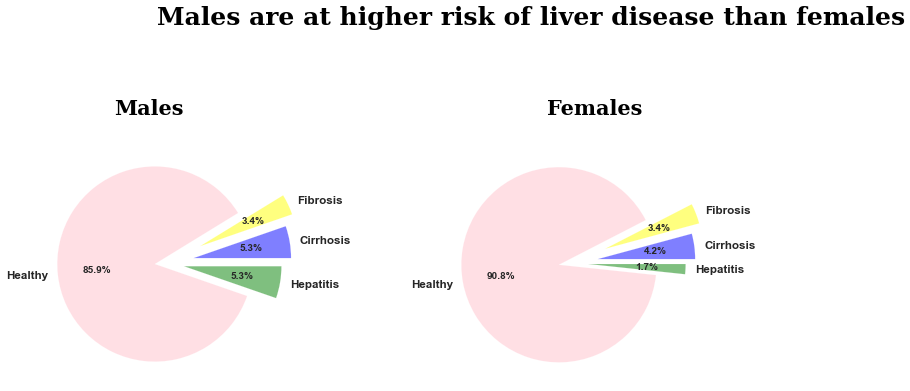

<Figure size 1600x800 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# --- Setting Colors, Labels, Order ---
colors=brown_grad[1:4]
labels=['0', '1', '2', '3']
order=df['Sex'].value_counts().index
fig = plt.figure(figsize = (24,10), dpi = 60)
gs = GridSpec(ncols=13, nrows=5, left=0.05, right=0.5, wspace=0.2, hspace=0.1)

ax1 = fig.add_subplot(gs[:, 0:5])
ax2 = fig.add_subplot(gs[:, 8:])


# axes list
axes = [ ax1,ax2]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f5f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

plt.figure(figsize=(16, 8))
plt.suptitle('Number of Males and Females with liver disease', fontweight='heavy', 
             fontsize='16', fontfamily='times new roman', color=black_grad[0])

# --- Pie Chart 1 ---
ax1_plot = ax1.pie(df[df.Sex == 'm'].groupby('Category').Category.count().values, 
                   labels=df.groupby('Category').Category.count().index,
                    autopct='%1.1f%%', explode=[0.3,  0.4, 0.1, 0.2])

for piece in ax1_plot[0]:
    piece.set_alpha(0.5)

for i, text in enumerate(ax1_plot[1]):
    text.set_weight('bold')
    text.set_size(14)

for i, text in enumerate(ax1_plot[2]):
    text.set_weight('bold')
    text.set_size(12)
    
fig.text(0.1, 0.75, 'Males',  {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})

# --- Pie Chart 2 ---
ax2_plot = ax2.pie(df[df.Sex == 'f'].groupby('Category').Category.count().values, 
                   labels=df.groupby('Category').Category.count().index,
                    autopct='%1.1f%%', explode=[0.3,  0.4, 0.1, 0.2])

for piece in ax2_plot[0]:
    piece.set_alpha(0.5)

for i, text in enumerate(ax2_plot[1]):
    text.set_weight('bold')
    text.set_size(14)

for i, text in enumerate(ax2_plot[2]):
    text.set_weight('bold')
    text.set_size(12)
    
fig.text(0.4, 0.75, 'Females',  {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})

# --- Text---

fig.text(0.105, 0.9, '    Males are at higher risk of liver disease than females',
         {'font':'Serif', 'weight':'bold','color': 'black', 'size':30}) 
plt.show()

Text(0.03, 0.98, 'Correlation Map of Numerical Variables')

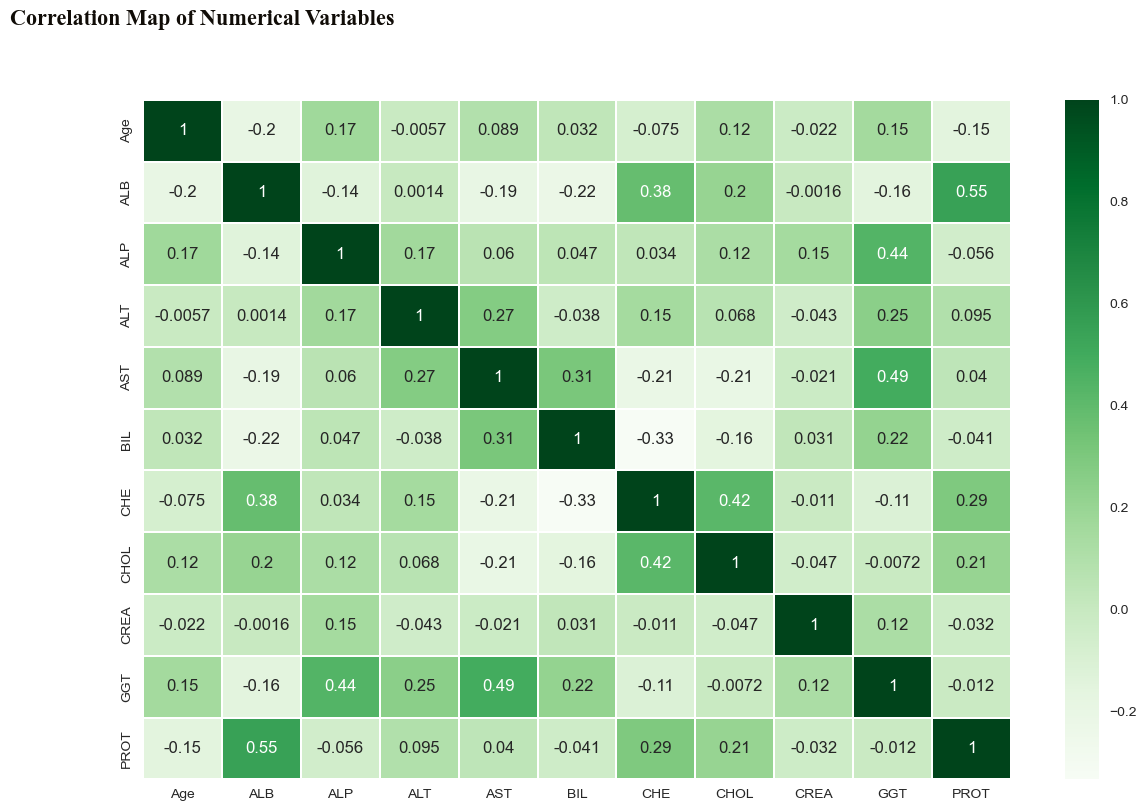

In [23]:
# --- Correlation Map (Heatmap) ---
plt.figure(figsize=(14, 9))
sns.heatmap(df.corr(), annot=True, cmap='Greens', linewidths=0.1)
plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', 
             x=0.03, y=0.98, ha='left', fontsize='16', fontfamily='Times new roman', 
             color=black_grad[0])

In [24]:
df_uniques = df.nunique() 
# Count number of distinct elements in specified axis. 
#Return Series with number of distinct elements. Can ignore NaN values.
df_uniques

Category      4
Age          49
Sex           2
ALB         190
ALP         414
ALT         341
AST         297
BIL         188
CHE         407
CHOL        313
CREA        117
GGT         358
PROT        198
dtype: int64

In [25]:
bin_vals = list(df_uniques[df_uniques == 2].index) # Create alist for our bin_vales (composed of at least two values)
bin_vals

['Sex']

In [26]:
categorical_vals  = list(df_uniques[(df_uniques > 2) & (df_uniques <=6)].index)
# This function allow us to determine how many categorical do we have actually those are more than 2 and less than 6
categorical_vals

['Category']

In [27]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

In [28]:
lb , le = LabelBinarizer(), LabelEncoder()

In [29]:
for col in categorical_vals: 
    df[col] = le.fit_transform(df[col])

In [30]:
for col in bin_vals: 
    df[col] = lb.fit_transform(df[col])

In [31]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,2,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,2,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,2,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,2,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [32]:
df.tail()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
611,0,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
612,0,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
613,0,64,0,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
614,0,46,0,33.0,66.2,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0
615,0,59,0,36.0,66.2,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0


In [33]:
df['Category'] = df['Category'].replace(2,1)
df['Category'] = df['Category'].replace(3,1)
print(df['Category'].where(df['Category'] == 3))

1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
       ..
611   NaN
612   NaN
613   NaN
614   NaN
615   NaN
Name: Category, Length: 615, dtype: float64


In [34]:
# --- Seperating Dependent Features ---
x = df.drop(['Category'], axis=1)
y = df['Category']

In [35]:
# --- Data Normalization using Min-Max Method ---
x = MinMaxScaler().fit_transform(x)

In [36]:
# --- Splitting Dataset into 80:20 ---
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [37]:
# --- Applying Logistic Regression ---
LRclassifier = LogisticRegression(max_iter=1000, random_state=1, solver='liblinear', penalty='l1')
LRclassifier.fit(x_train, y_train)

y_pred_LR = LRclassifier.predict(x_test)

.:. Logistic Regression Accuracy: 96.75% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.97      1.00      0.98       115

    accuracy                           0.97       123
   macro avg       0.98      0.75      0.82       123
weighted avg       0.97      0.97      0.96       123


.: Performance Evaluation
**************************


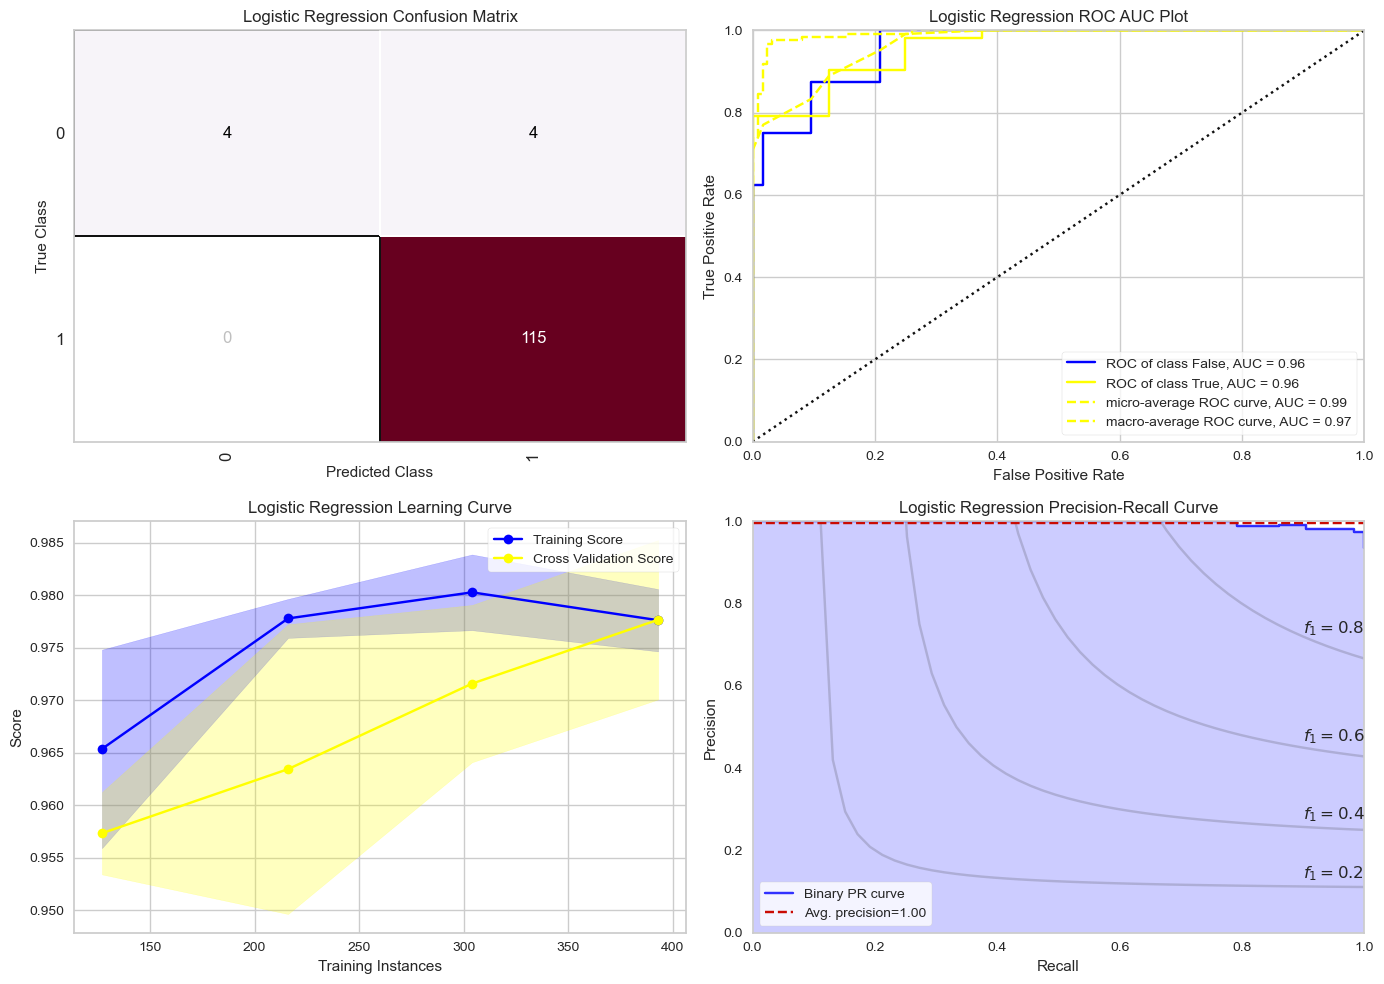

In [38]:
# --- LR Accuracy ---
LRAcc = accuracy_score(y_pred_LR, y_test)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(LRAcc*100)+' .:.')

# --- LR Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_LR))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- LR Confusion Matrix ---
logmatrix = ConfusionMatrix(LRclassifier, ax=ax1, cmap='PuRd',
                            title='Logistic Regression Confusion Matrix')
logmatrix.fit(x_train, y_train)
logmatrix.score(x_test, y_test)
logmatrix.finalize()

# --- LR ROC AUC ---
logrocauc = ROCAUC(LRclassifier, classes=['False', 'True'], ax=ax2,
                   title='Logistic Regression ROC AUC Plot')
logrocauc.fit(x_train, y_train)
logrocauc.score(x_test, y_test)
logrocauc.finalize()

# --- LR Learning Curve ---
loglc = LearningCurve(LRclassifier, ax=ax3, title='Logistic Regression Learning Curve')
loglc.fit(x_train, y_train)
loglc.finalize()

# --- LR Precision Recall Curve ---
logcurve = PrecisionRecallCurve(LRclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Logistic Regression Precision-Recall Curve')
logcurve.fit(x_train, y_train)
logcurve.score(x_test, y_test)
logcurve.finalize()

plt.tight_layout();

In [39]:
# --- Applying KNN ---
KNNClassifier = KNeighborsClassifier(n_neighbors=3)
KNNClassifier.fit(x_train, y_train)

y_pred_KNN = KNNClassifier.predict(x_test)

.:. K-Nearest Neighbour Accuracy: 97.56% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.97      1.00      0.99       115

    accuracy                           0.98       123
   macro avg       0.99      0.81      0.88       123
weighted avg       0.98      0.98      0.97       123


.: Performance Evaluation
**************************


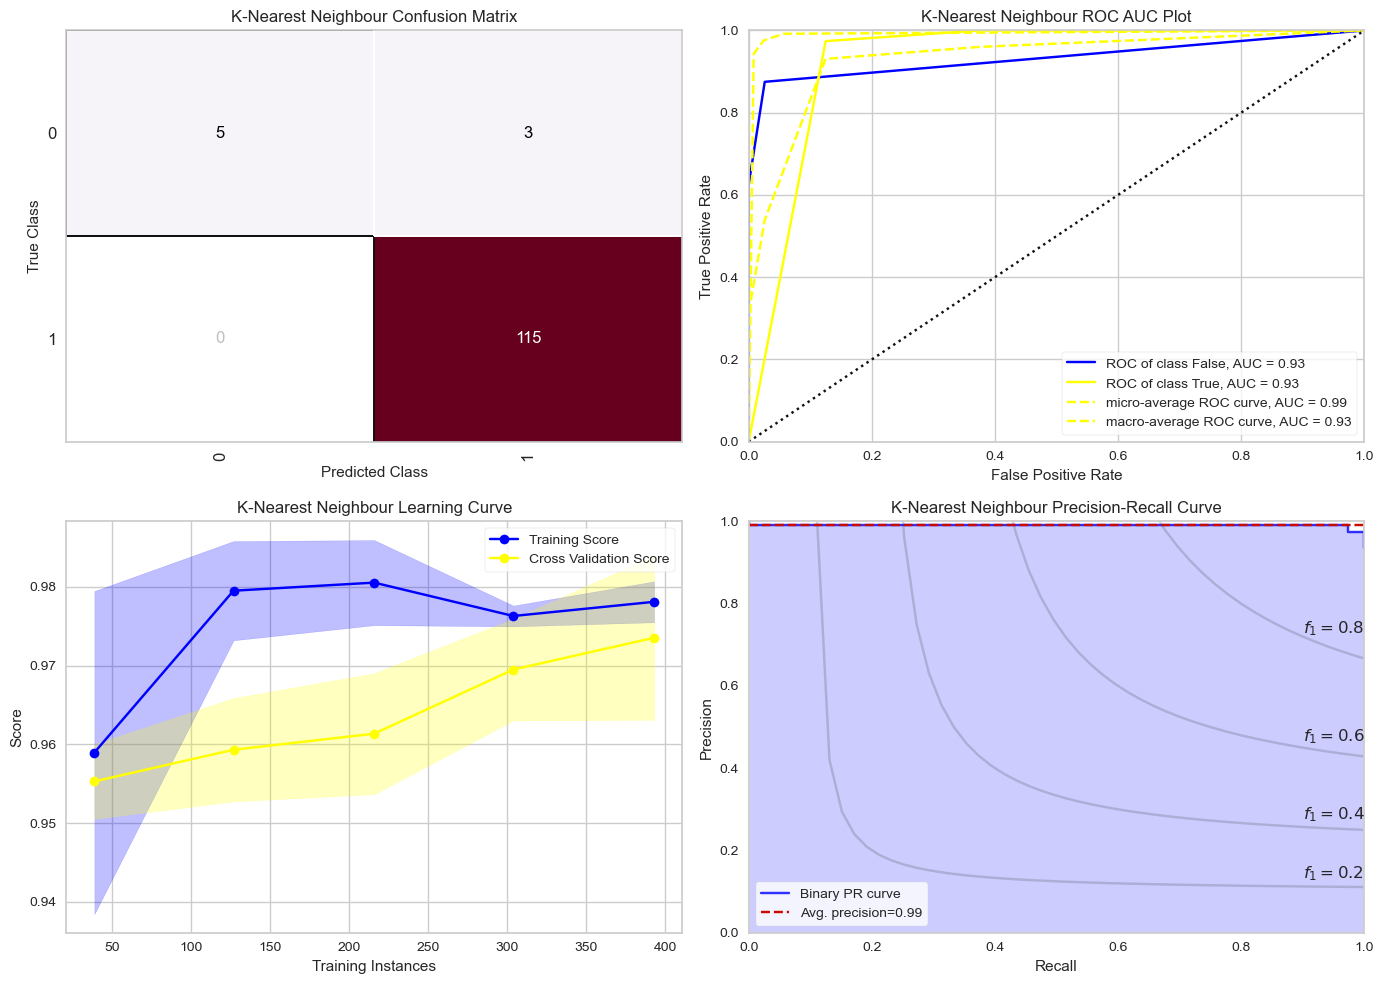

In [40]:
# --- KNN Accuracy ---
KNNAcc = accuracy_score(y_pred_KNN, y_test)
print('.:. K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100)+' .:.')

# --- KNN Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_KNN))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- KNN Confusion Matrix ---
knnmatrix = ConfusionMatrix(KNNClassifier, ax=ax1, cmap='PuRd',
                            title='K-Nearest Neighbour Confusion Matrix')
knnmatrix.fit(x_train, y_train)
knnmatrix.score(x_test, y_test)
knnmatrix.finalize()

# --- KNN ROC AUC ---
knnrocauc = ROCAUC(KNNClassifier, classes=['False', 'True'], ax=ax2,
                   title='K-Nearest Neighbour ROC AUC Plot')
knnrocauc.fit(x_train, y_train)
knnrocauc.score(x_test, y_test)
knnrocauc.finalize()

# --- KNN Learning Curve ---
knnlc = LearningCurve(KNNClassifier, ax=ax3, title='K-Nearest Neighbour Learning Curve')
knnlc.fit(x_train, y_train)
knnlc.finalize()

# --- KNN Precision Recall Curve ---
knncurve = PrecisionRecallCurve(KNNClassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                 title='K-Nearest Neighbour Precision-Recall Curve')
knncurve.fit(x_train, y_train)
knncurve.score(x_test, y_test)
knncurve.finalize()

plt.tight_layout();

In [41]:
# --- Applying SVM ---
SVMclassifier = SVC(kernel='linear', max_iter=1000, C=10, probability=True)
SVMclassifier.fit(x_train, y_train)

y_pred_SVM = SVMclassifier.predict(x_test)

.:. Support Vector Machine Accuracy: 98.37% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.98      1.00      0.99       115

    accuracy                           0.98       123
   macro avg       0.99      0.88      0.92       123
weighted avg       0.98      0.98      0.98       123


.: Performance Evaluation
**************************


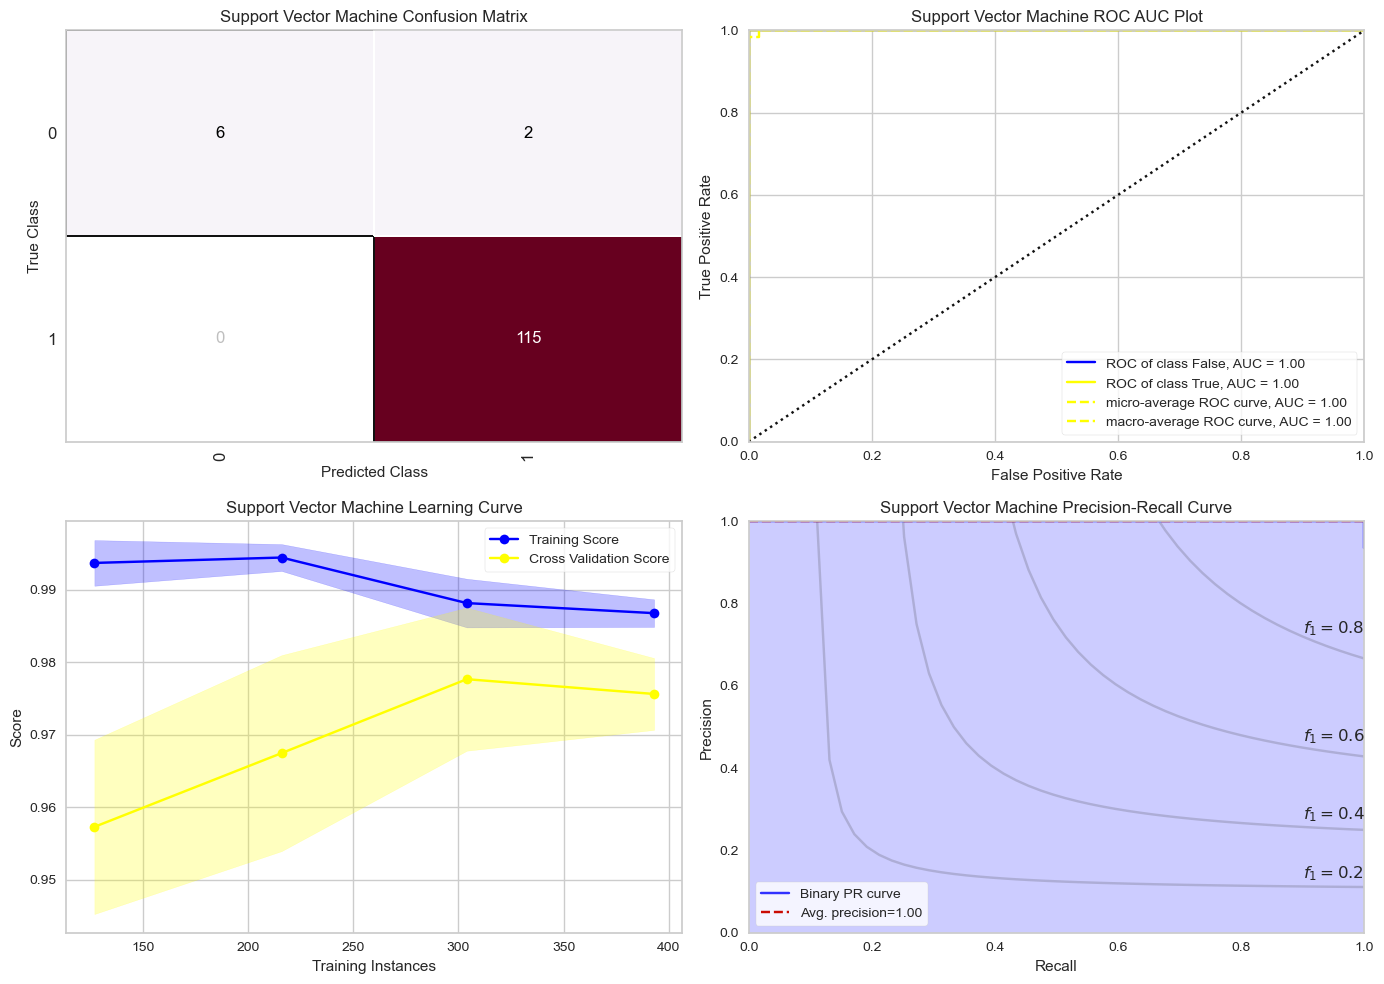

In [42]:
# --- SVM Accuracy ---
SVMAcc = accuracy_score(y_pred_SVM, y_test)
print('.:. Support Vector Machine Accuracy:'+'\033[1m {:.2f}%'.format(SVMAcc*100)+' .:.')

# --- SVM Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_SVM))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- SVM Confusion Matrix ---
svmmatrix = ConfusionMatrix(SVMclassifier, ax=ax1, cmap='PuRd',
                            title='Support Vector Machine Confusion Matrix')
svmmatrix.fit(x_train, y_train)
svmmatrix.score(x_test, y_test)
svmmatrix.finalize()

# --- SVM ROC AUC ---
svmrocauc = ROCAUC(SVMclassifier, classes=['False', 'True'], ax=ax2,
                   title='Support Vector Machine ROC AUC Plot')
svmrocauc.fit(x_train, y_train)
svmrocauc.score(x_test, y_test)
svmrocauc.finalize()

# --- SVM Learning Curve ---
svmlc = LearningCurve(SVMclassifier, ax=ax3, title='Support Vector Machine Learning Curve')
svmlc.fit(x_train, y_train)
svmlc.finalize()

# --- SVM Precision Recall Curve ---
svmcurve = PrecisionRecallCurve(SVMclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Support Vector Machine Precision-Recall Curve')
svmcurve.fit(x_train, y_train)
svmcurve.score(x_test, y_test)
svmcurve.finalize()

plt.tight_layout();

In [43]:
# --- Applying Gaussian NB ---
GNBclassifier = GaussianNB(var_smoothing=0.1)
GNBclassifier.fit(x_train, y_train)

y_pred_GNB = GNBclassifier.predict(x_test)

.:. Gaussian Naive Bayes Accuracy: 98.37% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.98      1.00      0.99       115

    accuracy                           0.98       123
   macro avg       0.99      0.88      0.92       123
weighted avg       0.98      0.98      0.98       123


.: Performance Evaluation
**************************


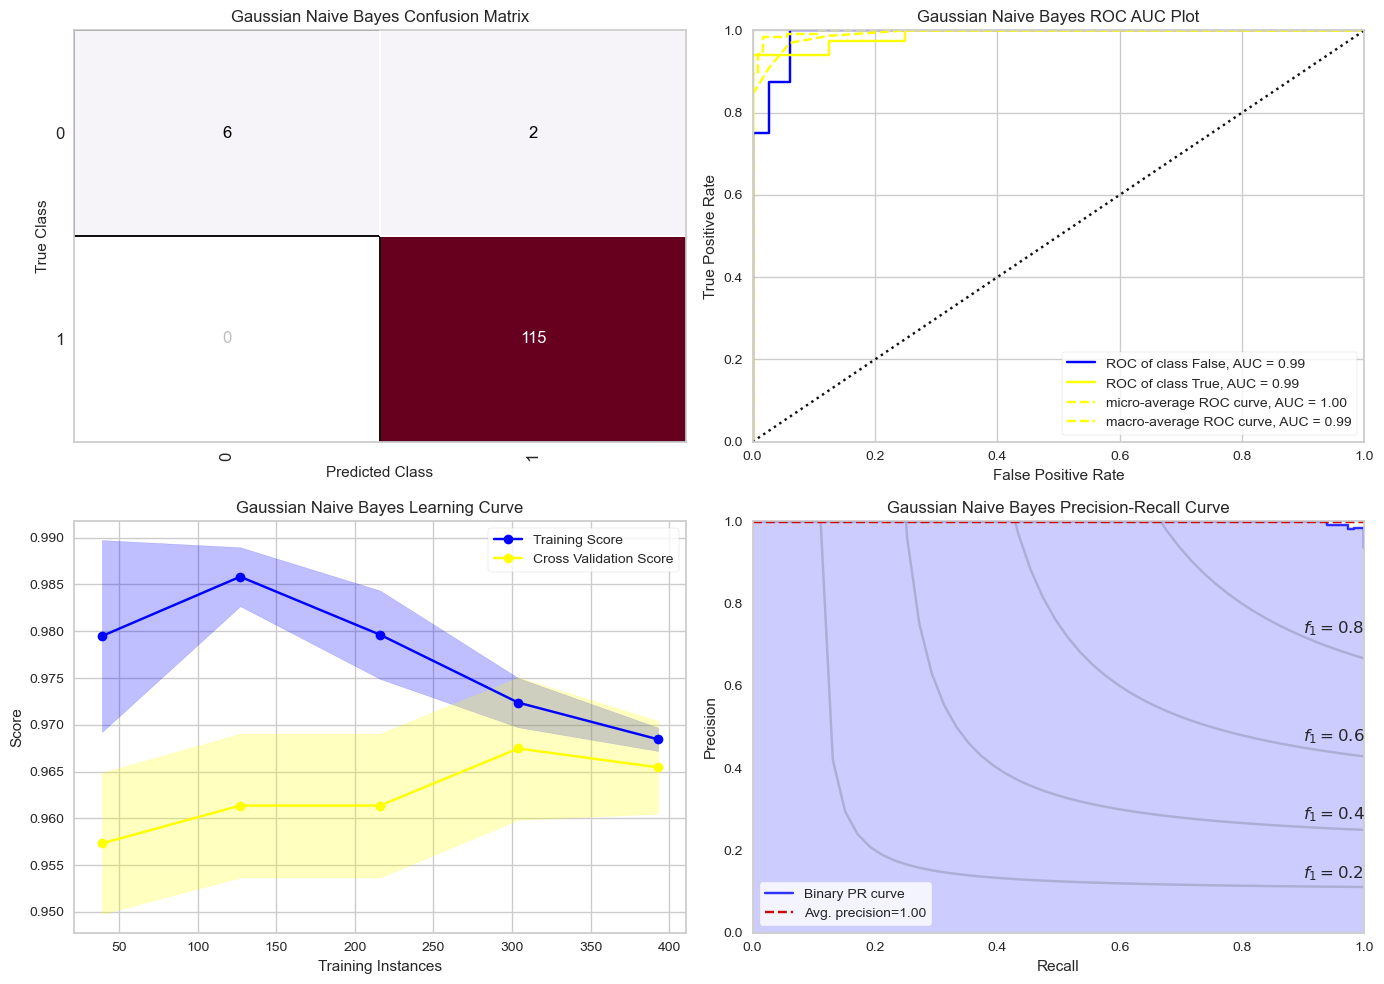

In [44]:
# --- GNB Accuracy ---
GNBAcc = accuracy_score(y_pred_GNB, y_test)
print('.:. Gaussian Naive Bayes Accuracy:'+'\033[1m {:.2f}%'.format(GNBAcc*100)+' .:.')

# --- GNB Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_GNB))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- GNB Confusion Matrix ---
gnbmatrix = ConfusionMatrix(GNBclassifier, ax=ax1, cmap='PuRd',
                            title='Gaussian Naive Bayes Confusion Matrix')
gnbmatrix.fit(x_train, y_train)
gnbmatrix.score(x_test, y_test)
gnbmatrix.finalize()

# --- GNB ROC AUC ---
gnbrocauc = ROCAUC(GNBclassifier, classes=['False', 'True'], ax=ax2,
                   title='Gaussian Naive Bayes ROC AUC Plot')
gnbrocauc.fit(x_train, y_train)
gnbrocauc.score(x_test, y_test)
gnbrocauc.finalize()

# --- GNB Learning Curve ---
gnblc = LearningCurve(GNBclassifier, ax=ax3, title='Gaussian Naive Bayes Learning Curve')
gnblc.fit(x_train, y_train)
gnblc.finalize()

# --- GNB Precision Recall Curve ---
gnbcurve = PrecisionRecallCurve(GNBclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Gaussian Naive Bayes Precision-Recall Curve')
gnbcurve.fit(x_train, y_train)
gnbcurve.score(x_test, y_test)
gnbcurve.finalize()

plt.tight_layout();

In [45]:
# --- Applying Decision Tree ---
DTCclassifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='entropy', min_samples_split=5,
                                       splitter='random', random_state=1)

DTCclassifier.fit(x_train, y_train)
y_pred_DTC = DTCclassifier.predict(x_test)

.:. Decision Tree Accuracy: 95.12% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.98      0.97      0.97       115

    accuracy                           0.95       123
   macro avg       0.79      0.86      0.82       123
weighted avg       0.96      0.95      0.95       123


.: Performance Evaluation
**************************


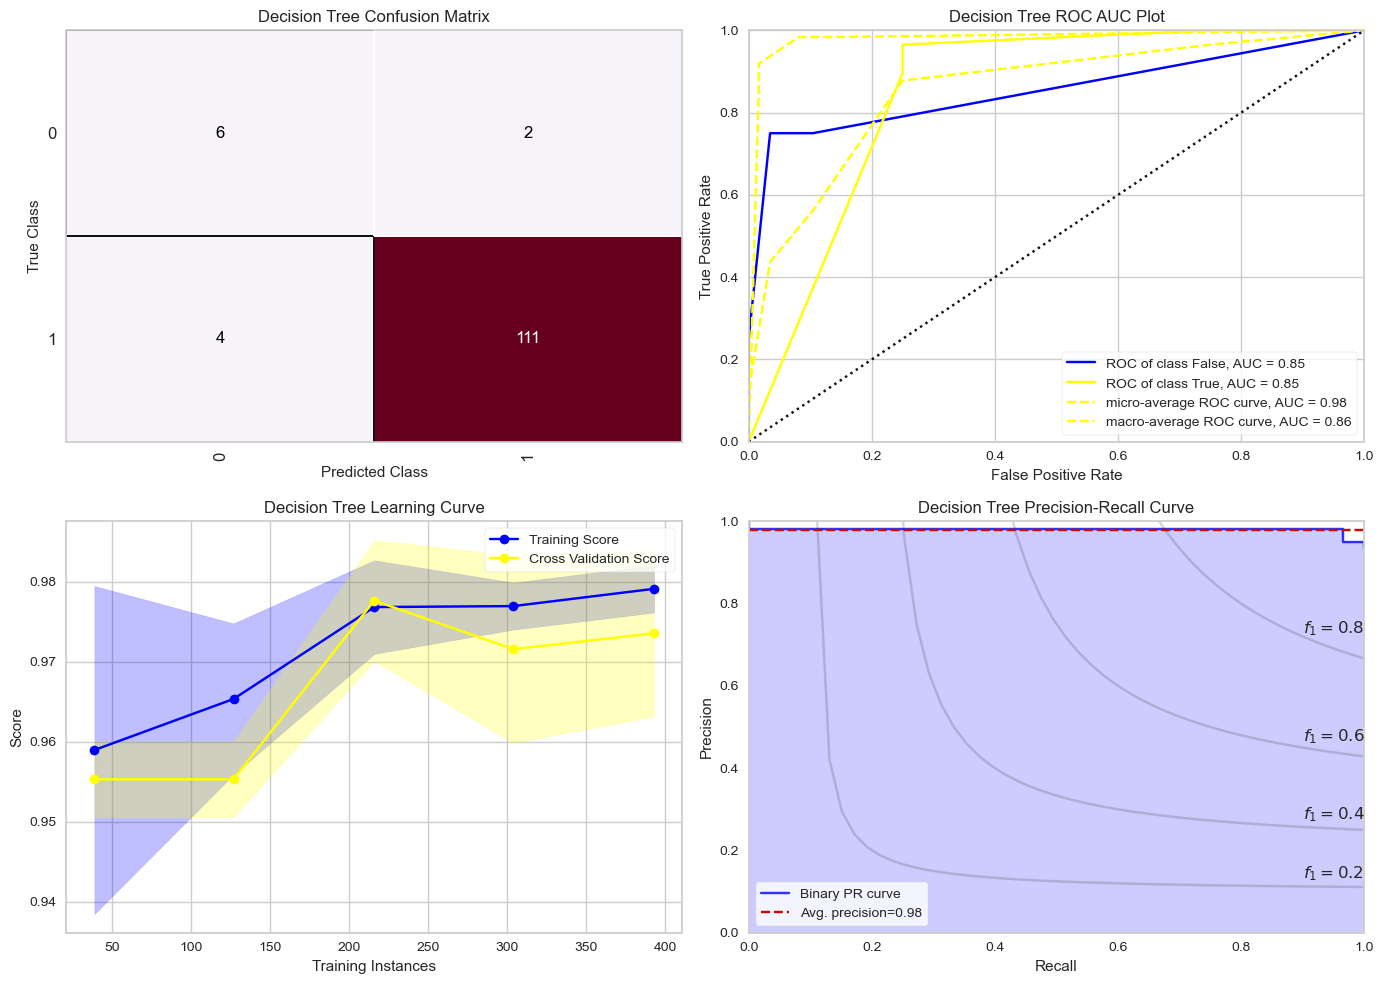

In [46]:
# --- Decision Tree Accuracy ---
DTCAcc = accuracy_score(y_pred_DTC, y_test)
print('.:. Decision Tree Accuracy:'+'\033[1m {:.2f}%'.format(DTCAcc*100)+' .:.')

# --- Decision Tree Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_DTC))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Decision Tree Confusion Matrix ---
dtcmatrix = ConfusionMatrix(DTCclassifier, ax=ax1, cmap='PuRd',
                            title='Decision Tree Confusion Matrix')
dtcmatrix.fit(x_train, y_train)
dtcmatrix.score(x_test, y_test)
dtcmatrix.finalize()

# --- Decision Tree ROC AUC ---
dtcrocauc = ROCAUC(DTCclassifier, classes=['False', 'True'], ax=ax2,
                   title='Decision Tree ROC AUC Plot')
dtcrocauc.fit(x_train, y_train)
dtcrocauc.score(x_test, y_test)
dtcrocauc.finalize()

# --- Decision Tree Learning Curve ---
dtclc = LearningCurve(DTCclassifier, ax=ax3, title='Decision Tree Learning Curve')
dtclc.fit(x_train, y_train)
dtclc.finalize()

# --- Decision Tree Precision Recall Curve ---
dtccurve = PrecisionRecallCurve(DTCclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                                title='Decision Tree Precision-Recall Curve')
dtccurve.fit(x_train, y_train)
dtccurve.score(x_test, y_test)
dtccurve.finalize()

plt.tight_layout();

In [47]:
# --- Applying Random Forest ---
RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(x_train, y_train)
y_pred_RF = RFclassifier.predict(x_test)

.:. Random Forest Accuracy: 96.75% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.97      1.00      0.98       115

    accuracy                           0.97       123
   macro avg       0.98      0.75      0.82       123
weighted avg       0.97      0.97      0.96       123


.: Performance Evaluation
**************************


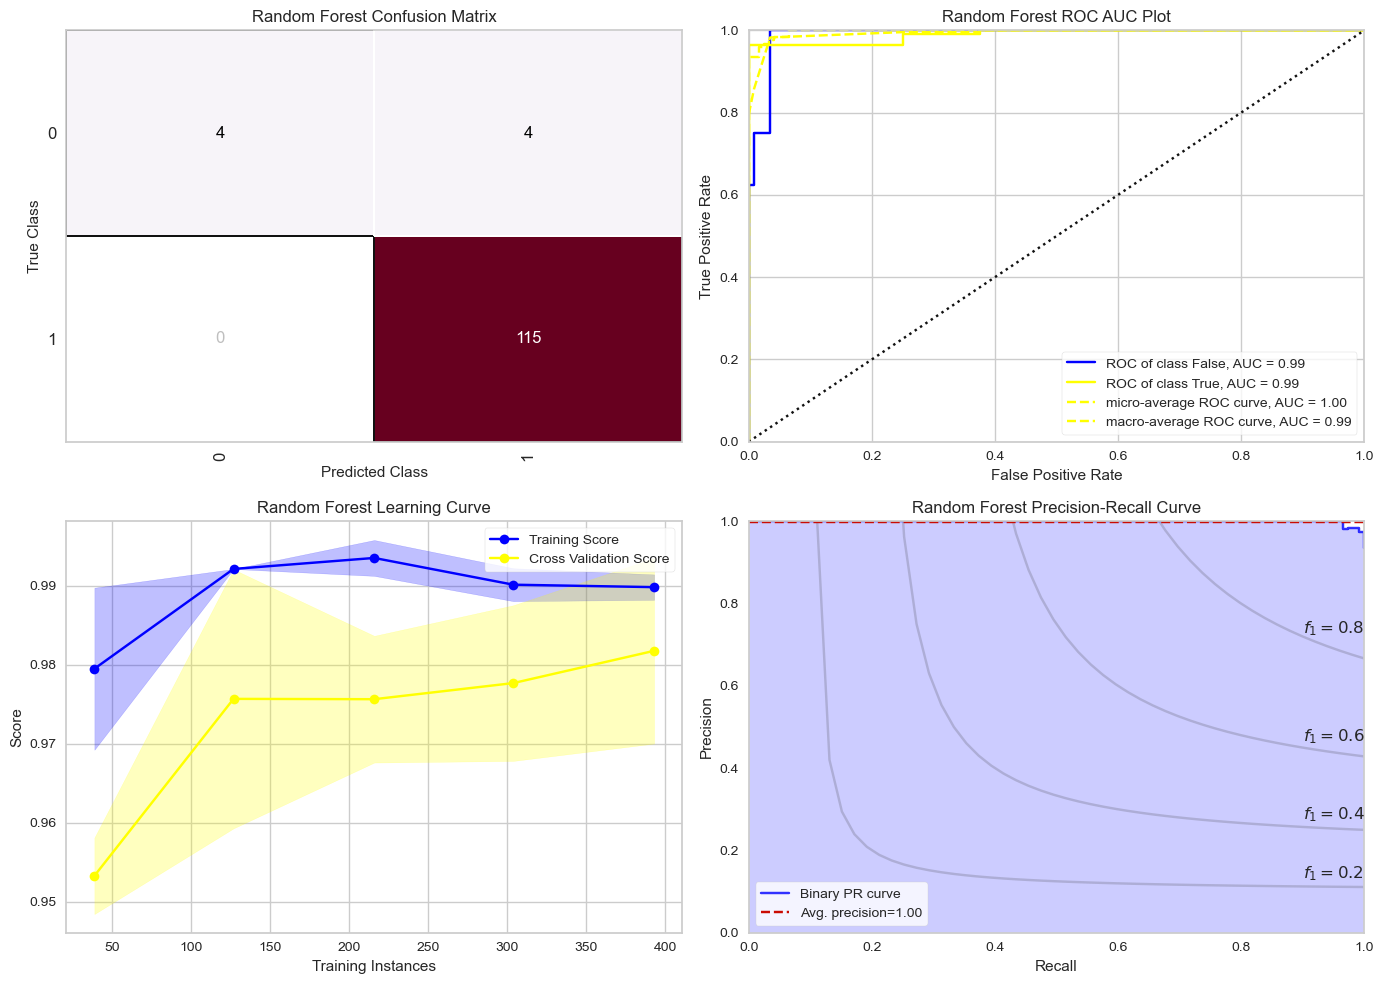

In [48]:
# --- Random Forest Accuracy ---
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc*100)+' .:.')

# --- Random FOrest Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_RF))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Random Forest Confusion Matrix ---
rfcmatrix = ConfusionMatrix(RFclassifier, ax=ax1, cmap='PuRd',
                            title='Random Forest Confusion Matrix')
rfcmatrix.fit(x_train, y_train)
rfcmatrix.score(x_test, y_test)
rfcmatrix.finalize()

# --- Random Forest ROC AUC ---
rccrocauc = ROCAUC(RFclassifier, classes=['False', 'True'], ax=ax2,
                   title='Random Forest ROC AUC Plot')
rccrocauc.fit(x_train, y_train)
rccrocauc.score(x_test, y_test)
rccrocauc.finalize()

# --- Random Forest Learning Curve ---
rcclc = LearningCurve(RFclassifier, ax=ax3, title='Random Forest Learning Curve')
rcclc.fit(x_train, y_train)
rcclc.finalize()

# --- Random Forest Precision Recall Curve ---
rcccurve = PrecisionRecallCurve(RFclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                                title='Random Forest Precision-Recall Curve')
rcccurve.fit(x_train, y_train)
rcccurve.score(x_test, y_test)
rcccurve.finalize()

plt.tight_layout();

In [49]:
# --- Applying ET ---
ETclassifier = ExtraTreesClassifier(n_estimators=15, random_state=47)

ETclassifier.fit(x_train, y_train)
y_pred_ET = ETclassifier.predict(x_test)

.:. Extra Tree Classifier Accuracy: 96.75% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.97      0.99      0.98       115

    accuracy                           0.97       123
   macro avg       0.90      0.81      0.85       123
weighted avg       0.97      0.97      0.97       123


.: Performance Evaluation
**************************


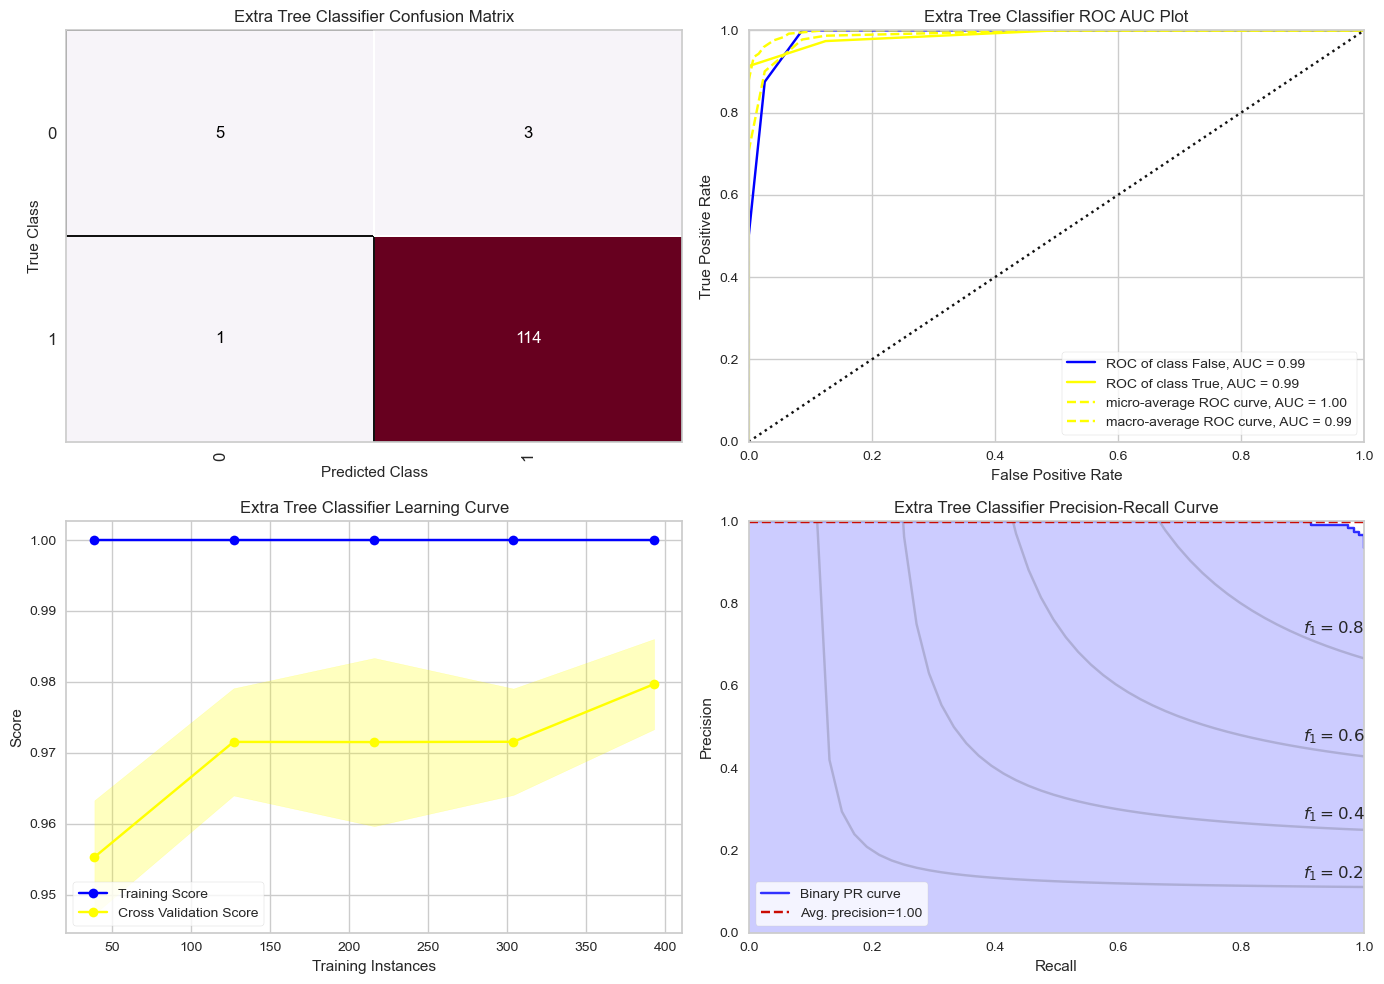

In [50]:
# --- ET Accuracy ---
ETAcc = accuracy_score(y_pred_ET, y_test)
print('.:. Extra Tree Classifier Accuracy:'+'\033[1m {:.2f}%'.format(ETAcc*100)+' .:.')

# --- ET Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_ET))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- ET Confusion Matrix ---
etcmatrix = ConfusionMatrix(ETclassifier, ax=ax1, cmap='PuRd',
                            title='Extra Tree Classifier Confusion Matrix')
etcmatrix.fit(x_train, y_train)
etcmatrix.score(x_test, y_test)
etcmatrix.finalize()

# --- ET ROC AUC ---
etrocauc = ROCAUC(ETclassifier, classes=['False', 'True'], ax=ax2,
                  title='Extra Tree Classifier ROC AUC Plot')
etrocauc.fit(x_train, y_train)
etrocauc.score(x_test, y_test)
etrocauc.finalize()

# --- ET Learning Curve ---
etlc = LearningCurve(ETclassifier, ax=ax3, title='Extra Tree Classifier Learning Curve')
etlc.fit(x_train, y_train)
etlc.finalize()

# --- ET Precision Recall Curve ---
etpc = PrecisionRecallCurve(ETclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                            title='Extra Tree Classifier Precision-Recall Curve')
etpc.fit(x_train, y_train)
etpc.score(x_test, y_test)
etpc.finalize()

plt.tight_layout();

In [51]:
# --- Applying Gradient Boosting ---
GBclassifier = GradientBoostingClassifier(random_state=1, n_estimators=100, max_leaf_nodes=3, loss='exponential', 
                                          min_samples_leaf=20)

GBclassifier.fit(x_train, y_train)
y_pred_GB = GBclassifier.predict(x_test)

.:. Gradient Boosting Accuracy: 96.75% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.97      0.99      0.98       115

    accuracy                           0.97       123
   macro avg       0.90      0.81      0.85       123
weighted avg       0.97      0.97      0.97       123


.: Performance Evaluation
**************************


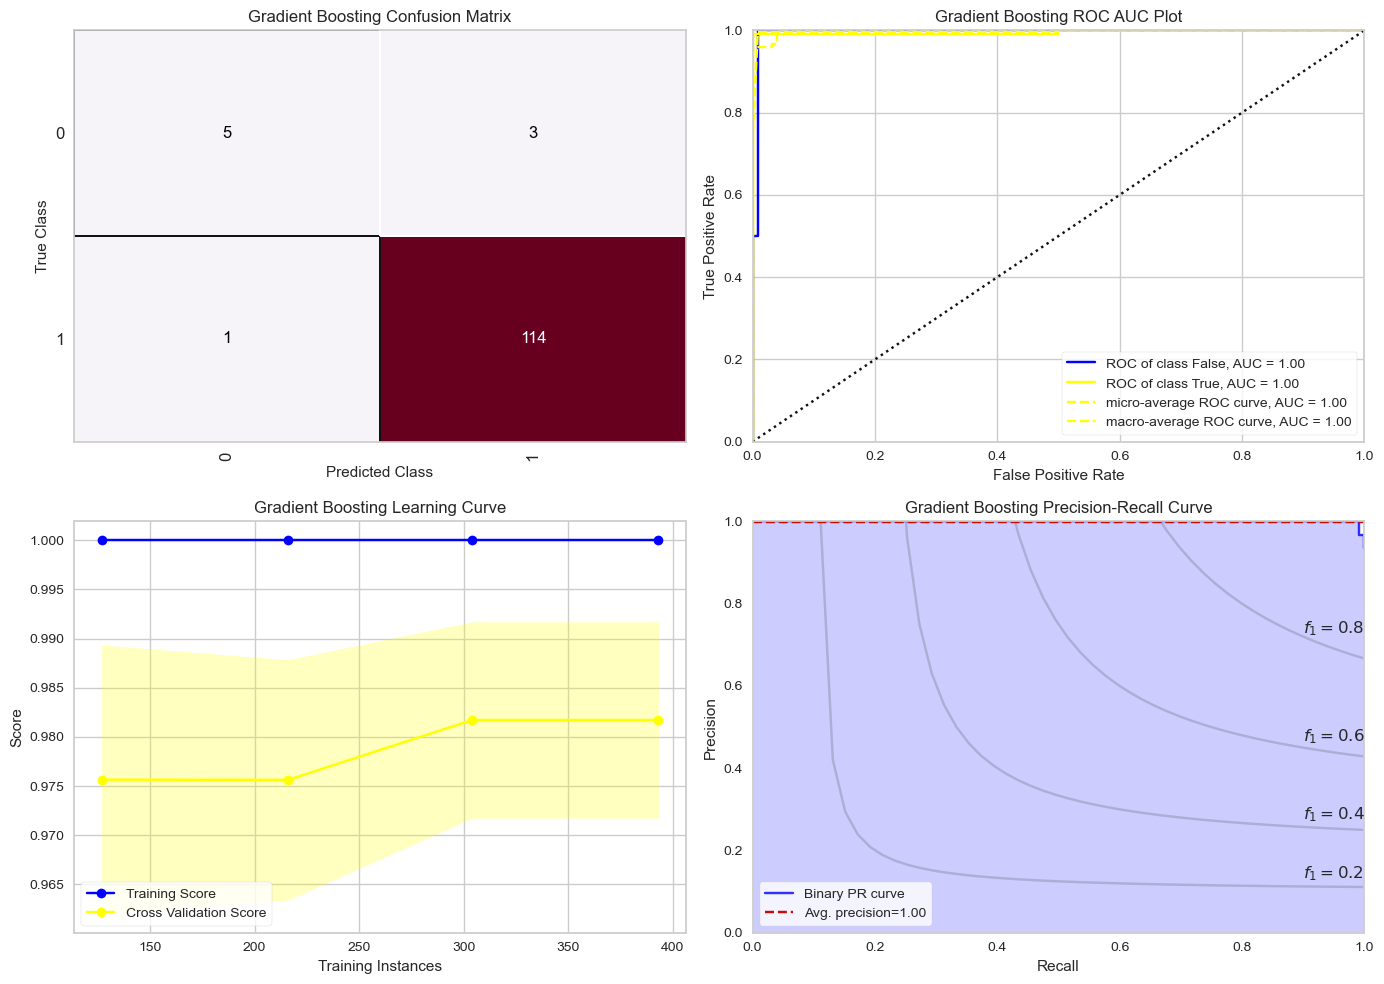

In [52]:
# --- Gradient Boosting Accuracy ---
GBAcc = accuracy_score(y_pred_GB, y_test)
print('.:. Gradient Boosting Accuracy:'+'\033[1m {:.2f}%'.format(GBAcc*100)+' .:.')

# --- Gradient Boosting Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_GB))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Gradient Boosting Confusion Matrix ---
gbcmatrix = ConfusionMatrix(GBclassifier, ax=ax1, cmap='PuRd',
                            title='Gradient Boosting Confusion Matrix')
gbcmatrix.fit(x_train, y_train)
gbcmatrix.score(x_test, y_test)
gbcmatrix.finalize()

# --- Gradient Boosting ROC AUC ---
gbcrocauc = ROCAUC(GBclassifier, classes=['False', 'True'], ax=ax2,
                   title='Gradient Boosting ROC AUC Plot')
gbcrocauc.fit(x_train, y_train)
gbcrocauc.score(x_test, y_test)
gbcrocauc.finalize()

# --- Gradient Boosting Learning Curve ---
gbclc = LearningCurve(GBclassifier, ax=ax3, title='Gradient Boosting Learning Curve')
gbclc.fit(x_train, y_train)
gbclc.finalize()

# --- Gradient Boosting Precision Recall Curve ---
gbcurve = PrecisionRecallCurve(GBclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                                title='Gradient Boosting Precision-Recall Curve')
gbcurve.fit(x_train, y_train)
gbcurve.score(x_test, y_test)
gbcurve.finalize()
plt.tight_layout();


In [53]:
# --- Applying AdaBoost ---
ABclassifier = AdaBoostClassifier(n_estimators=3)

ABclassifier.fit(x_train, y_train)
y_pred_AB = ABclassifier.predict(x_test)

.:. AdaBoost Accuracy: 96.75% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.97      1.00      0.98       115

    accuracy                           0.97       123
   macro avg       0.98      0.75      0.82       123
weighted avg       0.97      0.97      0.96       123


.: Performance Evaluation
**************************


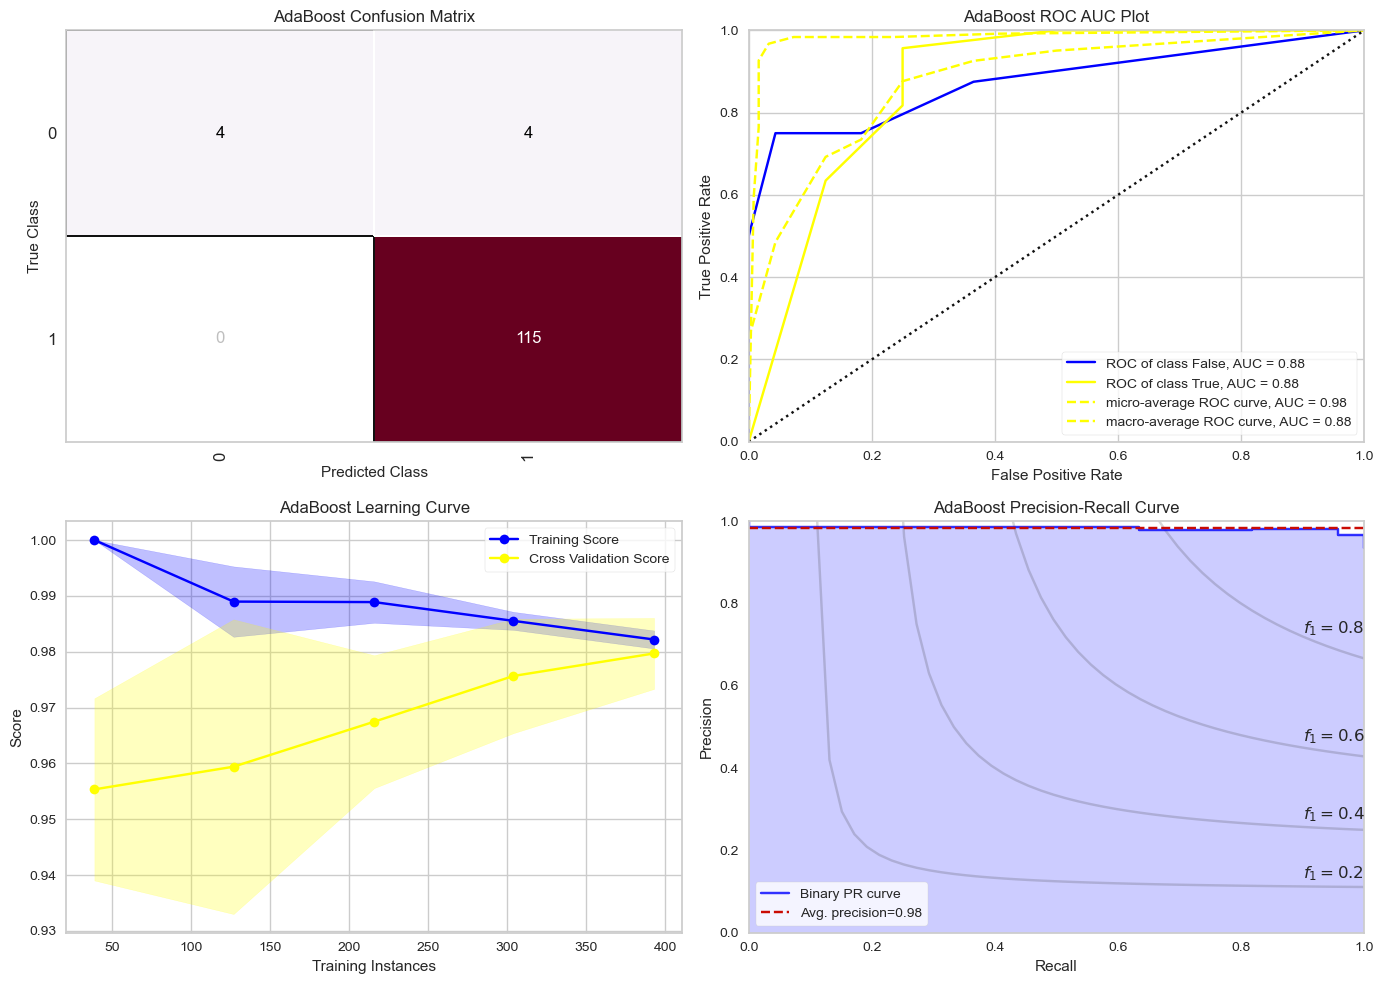

In [54]:
# --- AdaBoost Accuracy ---
ABAcc = accuracy_score(y_pred_AB, y_test)
print('.:. AdaBoost Accuracy:'+'\033[1m {:.2f}%'.format(ABAcc*100)+' .:.')

# --- AdaBoost Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_AB))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- AdaBoost Confusion Matrix ---
abcmatrix = ConfusionMatrix(ABclassifier, ax=ax1, cmap='PuRd',
                            title='AdaBoost Confusion Matrix')
abcmatrix.fit(x_train, y_train)
abcmatrix.score(x_test, y_test)
abcmatrix.finalize()

# --- AdaBoost ROC AUC ---
abrocauc = ROCAUC(ABclassifier, classes=['False', 'True'], ax=ax2,
                  title='AdaBoost ROC AUC Plot')
abrocauc.fit(x_train, y_train)
abrocauc.score(x_test, y_test)
abrocauc.finalize()

# --- AdaBoost Learning Curve ---
ablc = LearningCurve(ABclassifier, ax=ax3, title='AdaBoost Learning Curve')
ablc.fit(x_train, y_train)
ablc.finalize()

# --- AdaBoost Precision Recall Curve ---
abpc = PrecisionRecallCurve(ABclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                            title='AdaBoost Precision-Recall Curve')
abpc.fit(x_train, y_train)
abpc.score(x_test, y_test)
abpc.finalize()

plt.tight_layout();

In [55]:
# --- Create Accuracy Comparison Table ---
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 
                                  'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 
                                  'AdaBoost','Extra Tree Classifier'], 
                        'Accuracy': [LRAcc*100, KNNAcc*100, SVMAcc*100, GNBAcc*100, DTCAcc*100, RFAcc*100, GBAcc*100, 
                                     ABAcc*100, ETAcc*100]})

# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='GnBu').hide_index().set_properties(**{'font-family': 'Times New Roman'})

Model,Accuracy
Support Vector Machine,98.373984
Gaussian Naive Bayes,98.373984
K-Nearest Neighbour,97.560976
Logistic Regression,96.747967
Random Forest,96.747967
Gradient Boosting,96.747967
AdaBoost,96.747967
Extra Tree Classifier,96.747967
Decision Tree,95.121951


In [56]:
df.columns

Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [57]:
df.shape

(615, 13)

In [58]:
test = pd.DataFrame(x_test, columns=['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT'])
pred = pd.DataFrame(y_pred_LR, columns=['Category'])
prediction = pd.concat([test, pred], axis=1, join='inner')

In [59]:
# --- Display Prediction Result ---
prediction.head().style.background_gradient(cmap='Pastel1').hide_index().set_properties(**{'font-family': 'Times new roman'})

Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0.224138,1.000000,0.387816,0.056995,0.034525,0.160498,0.020537,0.825884,0.491505,0.034917,0.044245,0.581858,1
0.603448,1.000000,0.468053,0.157414,0.163995,0.092534,0.038705,0.344897,0.728155,0.071889,0.106281,0.672566,1
0.482759,1.000000,0.404160,0.173452,0.078607,0.050415,0.018562,0.605737,0.548544,0.083092,0.047649,0.723451,1
0.551724,1.000000,0.411590,0.142610,0.051480,0.056477,0.027251,0.932622,0.441748,0.068154,0.039295,0.730088,1
0.465517,1.000000,0.517088,0.091044,0.032676,0.022336,0.041074,0.354903,0.276699,0.091495,0.009437,0.672566,1


In [60]:
# --- Export Prediction Result into csv File ---
prediction.to_csv('prediction_liver_disease_akanksha.csv', index=False)

In [61]:
# --- Export Pickle File ---
file = open('liver_disease_SVM_akanksha.pkl', 'wb')
pickle.dump(SVMclassifier, file)

In [72]:
# --- Importing New Patient Dataset ---
df_new = pd.read_csv("C:/Users/akank/new_patient_ld.csv")
df_new.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0.224138,1,0.387816,0.056995,0.034525,0.160498,0.020537,0.825884,0.491505,0.034917,0.044245,0.581858


In [73]:
# --- Turn Information into List ---
data = df_new.loc[0, :].values.flatten().tolist()
data

[0.224137931,
 1.0,
 0.38781575,
 0.056994819,
 0.034525277,
 0.160497766,
 0.020537125,
 0.825883923,
 0.491504854,
 0.034917375,
 0.04424505,
 0.581858407]

In [74]:
# --- Prediction using Gradient Boosting ---
result = SVMclassifier.predict(df_new)

# --- Print Heart Disease Status ---
if result[0] == 1:
  print('\033[1m' + '.:. Liver Disease Detected!.:.' + '\033[0m')
else:
  print('\033[1m' + '.:. Liver Disease Not Detected!.:.' + '\033[0m')

.:. Liver Disease Detected!.:.
